## Setting up
This is a notebook where I am going to try and predict if a marvel character is good/bad based on physical attributes such as eyes, hair color, etc

In [1]:
# modules
import pandas as pd
import matplotlib.pyplot as plt

# data
marvel = pd.read_csv("./marvel-wikia-data.csv")

## Explore Data

In [3]:
# explore data
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16375,673702,Yologarch (Earth-616),\/Yologarch_(Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN


In [7]:
# further explorations
marvel.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [2]:
marvel["ALIGN"].value_counts()

Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64

array([[<AxesSubplot:title={'center':'page_id'}>,
        <AxesSubplot:title={'center':'APPEARANCES'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

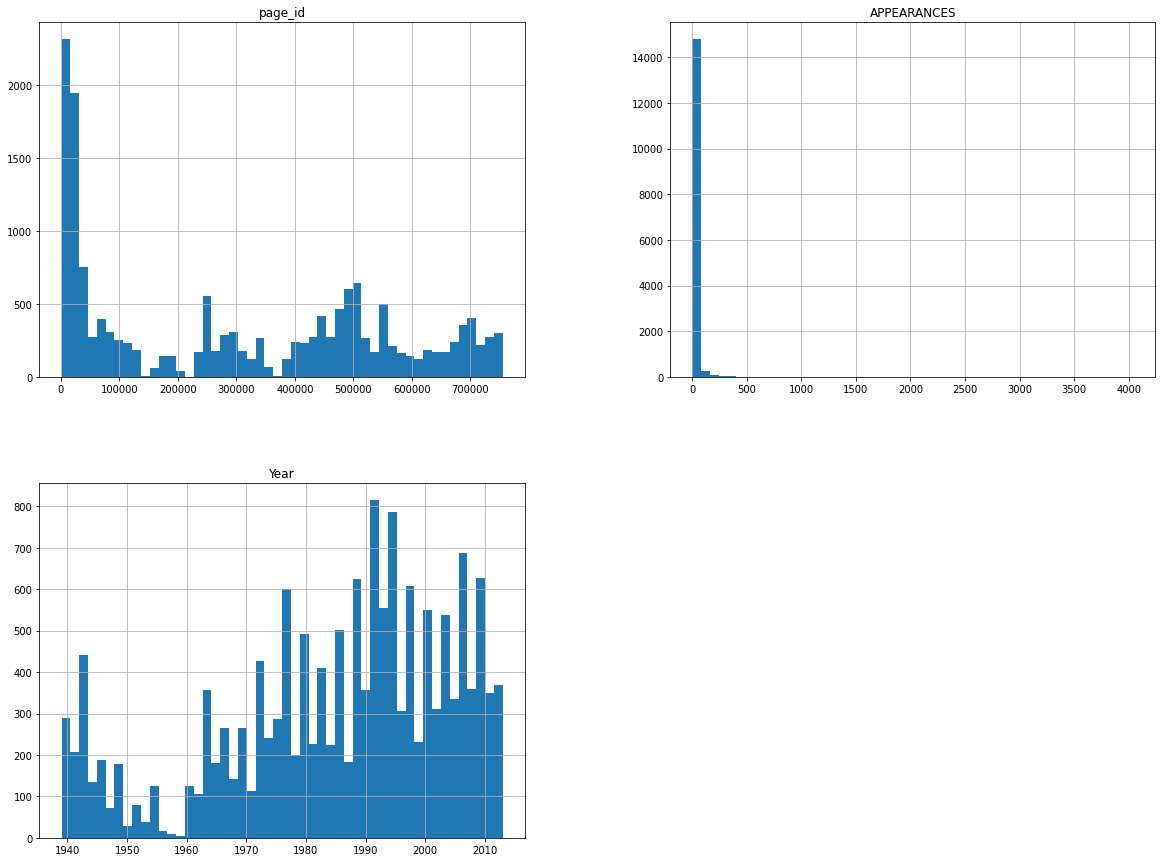

In [3]:
# some begining graphs
%matplotlib inline
marvel.hist(bins=50, figsize =(20,15))

No surprise that the appearances are more frequent towards the lower-end of the histogram. I am curious to know what caused a dip in Year on 1960. 

In [2]:
# Need to remove certain meta columns
marvel = marvel.drop(columns = ["urlslug", "GSM", "name"])

In [3]:
# any NULL values
any_missing = marvel.isnull().values.any()

# any null values in output
null_align = marvel.ALIGN.isnull().sum()

print(any_missing, null_align)

True 2812


In [4]:
# which columns with NAs

nan_values = marvel.isna()
nan_columns = nan_values.any()

columns_with_nan = marvel.columns[nan_columns].tolist()
print(columns_with_nan)

['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year']


In [5]:
# remove those with NA on align
marvel = marvel.dropna(subset=['ALIGN'])
# drop NAs for Year
marvel = marvel.dropna(subset=['Year'])


<AxesSubplot:>

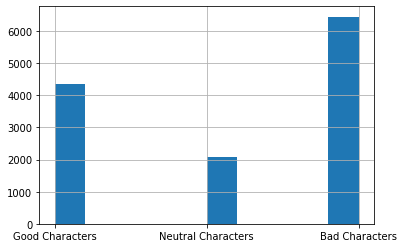

In [8]:
# marvel histogram
marvel['ALIGN'].hist()

## Split into Test/Train data

In [6]:
# create test/test datasets
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index, in split.split(marvel, marvel["ALIGN"]):
    marvel_train= marvel.iloc[train_index]
    marvel_test = marvel.iloc[test_index]

## Further Exploration Of Just Training Data

In [7]:
# see proportions for align
marvel_train["ALIGN"].value_counts()/len(marvel_train)

Bad Characters        0.500436
Good Characters       0.338764
Neutral Characters    0.160799
Name: ALIGN, dtype: float64

In [8]:
# table of eye and align
pd.crosstab(index=marvel_train['ALIGN'], columns=marvel['EYE'])

# bad characters seem to have more black and red eyes,
# while good characters seem to have more blue and brown eyes
# I am not seeing any clear pattern for neutral characters

EYE,Amber Eyes,Black Eyeballs,Black Eyes,Blue Eyes,Brown Eyes,Compound Eyes,Gold Eyes,Green Eyes,Grey Eyes,Hazel Eyes,...,Orange Eyes,Pink Eyes,Purple Eyes,Red Eyes,Silver Eyes,Variable Eyes,Violet Eyes,White Eyes,Yellow Eyeballs,Yellow Eyes
ALIGN,,,,,,,,,,,,,,,,,,,,,
Bad Characters,2,0,149,439,459,1,2,216,28,22,...,13,5,10,232,4,18,4,126,2,110
Good Characters,0,2,111,643,564,0,3,135,21,19,...,5,6,3,51,3,5,1,75,2,25
Neutral Characters,1,1,72,235,217,0,3,70,18,12,...,4,0,4,50,1,8,2,43,0,28


In [56]:
# table of align and hair color
pd.crosstab(index=marvel_train['ALIGN'], columns=marvel['HAIR'])

# bad characters seem to have bald or black hair
# good characters seem to have brown hair or red hair
# and I am not seeing any clear pattern for neutral characters, like in eye color

HAIR,Bald,Black Hair,Blond Hair,Brown Hair,Grey Hair,No Hair,Red Hair,White Hair,other
ALIGN,,,,,,,,,
Bad Characters,225,1015,405,627,141,324,149,211,116
Good Characters,157,709,285,445,97,234,121,134,103
Neutral Characters,77,318,121,196,40,102,56,51,40


In [39]:
# lets look at secret identiy
pd.crosstab(index=marvel_train['ALIGN'], columns=marvel['ID'])

# bad characters seem to have the most secret identities

ID,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity
ALIGN,,,,
Bad Characters,3,340,1132,2480
Good Characters,8,472,1249,1210
Neutral Characters,2,268,541,611


In [50]:
# lets look at sex
pd.crosstab(index=marvel_train['ALIGN'], columns=marvel['SEX'])

# it appears more female charactes are good and more male characters are bad

SEX,Agender Characters,Female Characters,Genderfluid Characters,Male Characters
ALIGN,,,,
Bad Characters,12,746,0,4103
Good Characters,8,1142,1,2257
Neutral Characters,11,472,1,1086


## Transform Data

In [72]:
# create custom transformer for date
from sklearn.base import BaseEstimator, TransformerMixin
from pandas.api.types import CategoricalDtype

class ChangeDate(BaseEstimator, TransformerMixin):
    def _init_(self):
        print('starting init')
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        first_appearance = X["FIRST APPEARANCE"].str.extract(r'([A-Z][a-z]+)')
        X = X.drop(columns=["FIRST APPEARANCE"])
        return np.c_[X, first_appearance]

# create processing pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# numger pipeline
num_pipeline = Pipeline([
    ('impute_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('inpute_cat', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

dat_pipeline = Pipeline([
    ('get_month', ChangeDate()),
    ('encoder', OneHotEncoder()),
])

num_attributes = list(marvel_train[["APPEARANCES", "Year"]])
cat_attributes = list(marvel_train[["ID", "EYE", "HAIR", "SEX", "ALIVE"]])
dt_attributes = list(marvel_train[["FIRST APPEARANCE"]])

from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer(
    transformers = [
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes),
    ("dt", dat_pipeline, dt_attributes)],
remainder = "drop")

marvel_train_prep = full_pipeline.fit_transform(marvel_train)

## Create Model

In [73]:
# separate out outcome variable
marvel_align = marvel_train["ALIGN"]

# get random forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(marvel_train_prep, marvel_align)

RandomForestClassifier()

In [74]:
# lets get a second model to compare the random forest to
# going to use a support vector machine model

from sklearn.svm import SVC

svm = SVC()

svm.fit(marvel_train_prep, marvel_align)

SVC()

## Evaluate Model

In [75]:
# Now that I have my two models, let's see how they compare

# I am going to use cross validation
from sklearn.model_selection import cross_val_score

# start with random forest
rf_score = cross_val_score(rf, marvel_train_prep, marvel_align, cv=5, scoring='accuracy')


In [76]:
# now lets look at the svm
svm_score = cross_val_score(svm, marvel_train_prep, marvel_align, cv=5, scoring='accuracy')

In [77]:
# comparison of the two models
comp = (rf_score, svm_score)
comp

# These are not exactly the best accuracies either way, but it looks like random forest 
# does the best, for kicks lets see if we can visualize the accuracy of these models

(array([0.58603975, 0.5771096 , 0.57953443, 0.5756547 , 0.55868089]),
 array([0.5758604 , 0.58341416, 0.59020369, 0.59553831, 0.58389913]))

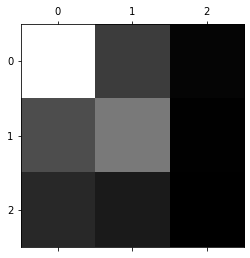

In [78]:
# random forest
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
rf_train_predict = cross_val_predict(rf, marvel_train_prep, marvel_align, cv=5)

rf_mx = confusion_matrix(marvel_align, rf_train_predict)
plt.matshow(rf_mx, cmap=plt.cm.gray)
plt.show()

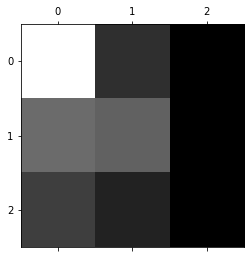

In [36]:
svm_train_predict = cross_val_predict(svm, marvel_train_prep, marvel_align, cv=5)

svm_mx = confusion_matrix(marvel_align, svm_train_predict)
plt.matshow(svm_mx, cmap=plt.cm.gray)
plt.show()

From these plots, they almost look pretty similar in iding the marvel character's allegiance

## Model Turning

Next let's see if we can fine tune the random forest model, since it is a more acurate model, by addressing the hypterparameters.

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [3, 10, 30, 40, 50, 60, 70], 'max_features': [2, 4, 6, 8, 10, 12, 14], 'n_estimators': [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
]

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True, scoring = 'accuracy')

grid_search.fit(marvel_train_prep, marvel_align)

KeyboardInterrupt: 

In [28]:
grid_search.best_params_

{'max_depth': 40, 'max_features': 12, 'n_estimators': 1}

In [29]:
# see all evaluation scores
cvrf = grid_search.cv_results_
for accuracy, params in zip(cvrf['mean_test_score'], cvrf['params']):
    print(accuracy, params)

0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 1}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 2}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 5}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 6}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 7}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 8}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 9}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 10}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 11}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 12}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 13}
0.500436445939332 {'max_depth': 3, 'max_features': 2, 'n_estimators': 15}
0.500436445939332 {'max_depth': 3, 'max_features': 4, 'n_estimators': 1}
0.500436445939332 {'max_depth': 3, 'max_featur

In [68]:
# see feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = []
cat_one_hot_attribs = list(cat_encoder.steps[-1][1].get_feature_names_out())
attributes = num_attributes + dt_attributes + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.059654599997355895, 'x0_Hiro-Amin (Earth-616)'),
 (0.05951271298026865, 'x0_Liam Cassidy (Earth-616)'),
 (0.04756838671445763, 'x0_Jeff Kaplan (Earth-616)'),
 (0.047423378405164654, 'x0_Jou-Jouka (Earth-616)'),
 (0.03576471474083852, 'x0_Ripster (Android) (Earth-616)'),
 (0.03572655959043953, 'x0_Wade Huston (Earth-616)'),
 (0.03565551521734886, 'x0_Drake Maluski (Earth-616)'),
 (0.03563468028444088, "x0_Josiah's Surrogate Mother (Earth-616)"),
 (0.035624106008122804, 'x0_Kip Holm (Earth-616)'),
 (0.0356055779806531, 'x0_Allie Magruder (Earth-616)'),
 (0.035540936208130744, 'x0_Factor-X (Earth-616)'),
 (0.03154244903475138, 'x0_Father Spider (Earth-616)'),
 (0.03146618047760607, 'x0_Jean Claude Pennysworth (Earth-616)'),
 (0.0265475591152768, 'x0_Ricardo Jones (Earth-616)'),
 (0.023832694631055105, 'x0_Herbert Isaacs (Earth-616)'),
 (0.02382337315077308, 'x0_Roscoe Sweeney (Earth-616)'),
 (0.023725517948240005, 'x0_Ul-Uhar (Earth-616)'),
 (0.02370955245087225, 'x0_Kyle Brock (Earth

## Apply To Test set

In [71]:
final_model = grid_search.best_estimator_
x_test = marvel.drop('ALIGN', axis=1)
y_test = marvel_test['ALIGN'].copy()

x_test_prep = full_pipeline.transform(x_test)


ValueError: Found unknown categories ['Hounds of Helios (Earth-616)', 'Edward Stanford (Earth-616)', 'Harley Traynor (Earth-616)', 'Avios (Earth-616)', 'Raleigh Chamberlain (Earth-616)', 'Salome (Earth-616)', 'Keith Dixon (Earth-616)', 'Danbury Fawcett (Earth-616)', 'Plutonia II (Earth-616)', 'Rebecca Ryker (Earth-616)', 'Jeff Graves (Earth-616)', 'Lord Defender (Earth-616)', 'Compressor (Earth-616)', 'Calico Kid (Earth-616)', 'Elaine McLaughlin (Earth-616)', 'Angelo Macon (Earth-616)', 'Nedrocci Tannengarden (Earth-616)', 'Carl Rives (Earth-616)', 'Cowboy (Legion Personality) (Earth-616)', 'Slug (Alien) (Earth-616)', 'Demolisher (Robot) (Earth-616)', 'Chromium (Element) (Earth-616)', 'Natalie Turner (Earth-616)', 'Mother (Earth-616)', 'Taylor Blackwell (Earth-616)', "Yoshi's mother (Earth-616)", 'Bermuda Schwartz (Earth-616)', 'Redcoat (Earth-616)', 'Colonel Brusch (Earth-616)', 'Empathoid (Earth-616)', 'Vane (Earth-616)', 'Jane Newell (Earth-616)', 'Mills Gilligan (Earth-616)', 'Broo (Earth-616)', 'Jess Harrison (Earth-616)', 'Rattusk (Earth-616)', 'Cyra (Asgardian) (Earth-616)', 'Clifford Michaels (Earth-616)', 'Lightning Fist (Earth-616)', 'Karima (Earth-616)', 'Willard Weir (Earth-616)', 'Feng Po-po (Earth-616)', 'Damon Mathias (Earth-616)', 'Shu-Hu (Earth-616)', 'Dendrok (Earth-616)', 'Josef Stalin (Earth-616)', 'Daphne (Earth-616)', 'Darkstrider (Earth-616)', 'Devon Ballantine (Earth-616)', 'Pillar (Earth-616)', 'Courtney Johnson (Earth-616)', 'Cold War (Earth-616)', 'Jenny (Dead Girl) (Earth-616)', 'Rita Worth (Earth-616)', 'Daniel Brito (Earth-616)', 'Schoolmaster (Earth-616)', 'Paul Conklin (Earth-616)', 'Augustus Tuneski (Earth-616)', 'Orwell (Earth-616)', 'Hedron theFaceted (Earth-616)', 'Francis Klum (Earth-616)', 'Hakon (Earth-616)', 'Afterburner (Earth-616)', 'Meg Langtry (Earth-616)', 'Lemuel McPhee (Earth-616)', 'Melanie Crane (Earth-616)', 'Helleyes (Earth-616)', 'Larry Arnold (Earth-616)', 'Peter Gyrich (Piecemeal) (Earth-616)', 'Jack Brennan (Earth-616)', 'Gerard Cooper (Earth-616)', 'Abraham Verne (Earth-616)', 'Sapphiras (Earth-616)', 'Tongar (Earth-616)', 'Rose Spencer (Earth-616)', "Wishing Man (Triumph Division's second incarnation) (Earth-616)", 'Anton Harvey (Earth-616)', 'Striker (Hatchitech) (Earth-616)', 'Deadshot Darrance (Earth-616)', 'Pandemonia (Earth-616)', 'Lordin (Earth-616)', 'Graydon Creed (Earth-616)', 'Victor Borkowski (Earth-616)', 'Tomi Shishido (Earth-616)', 'Crimson Commando (Brotherhood of Mutants) (Earth-616)', 'Rupert Kingsley (Earth-616)', 'Gruto (Earth-616)', 'Floyd Mangles (Earth-616)', 'Matu Makalani (Earth-616)', 'Phillip le Guin (Earth-616)', 'Rafe Scanlon (Earth-616)', 'Eel (Nazi) (Earth-616)', 'Nebulo (Earth-616)', 'Cancer (Ecliptic) (Earth-616)', 'Leeann Foreman (Earth-616)', 'Grond (Earth-616)', 'Swami Krishna (Earth-616)', 'Paula Jackson (Earth-616)', 'Agent Gorman (Earth-616)', 'Clete Billups (Earth-616)', 'Miles Lipton (Earth-616)', 'Mister Slade (Earth-616)', 'Kao-Gotu Suru (Earth-616)', 'Douglas Scott (Earth-616)', 'Fahe (Earth-616)', 'Brian Cruz (Earth-616)', 'Billy Turner (Earth-616)', 'Carlo Zota (Earth-616)', 'Mastermind (Computer) (Earth-616)', 'Psycho-Man (Earth-616)', 'Musenda (Earth-616)', 'Anton Vanko (Whiplash) (Earth-616)', 'Thiago Piranha (Earth-616)', 'Tess Walker (Earth-616)', 'Gabriel Cohuelo (Earth-616)', 'Aelfyre Whitemane (Earth-616)', 'Bart Rozum (Earth-616)', 'Drasil (Earth-616)', 'Omega Black (Earth-616)', 'Purge (Genoshan) (Earth-616)', 'Jamala (Earth-616)', 'Regent (Earth-616)', 'Chuda (Earth-616)', 'Brule (Earth-616)', 'Inga von Leche (Earth-616)', 'Mister Kruger (Earth-616)', 'Bellos (Earth-616)', 'A (Earth-616)', 'Aa-Gorn (Earth-616)', 'Askare (Earth-616)', 'High Technician (Earth-616)', 'Deconsecrator (Earth-616)', 'Frisco Pike (Earth-616)', 'Yidrazil (Earth-616)', 'Hans Klaus (Earth-616)', 'Georgia Jenkins (Earth-616)', 'Anton Hellgate (Earth-616)', 'Numa (Earth-616)', 'Black Ogre (Earth-616)', 'Baron von Wetzel (Earth-616)', 'Robert Jameson (Earth-616)', 'Dam-Ayido Wede (Earth-616)', 'Ted Sparks (Earth-616)', 'Sian Bowen (Earth-616)', 'Tuvia (Earth-616)', 'Silence (Death Squad) (Earth-616)', 'Jocasta (Earth-616)', 'Satan (Nowhere) (Earth-616)', 'Alfred Tooks (Earth-616)', 'Arthur Parks (Heroes Reborn) (Earth-616)', 'Mole Monster (Earth-616)', 'Black Swan (Earth-616)', 'Leslie Kinney (Earth-616)', 'Gregory Gideon (Earth-616)', 'Aleister Kane (Earth-616)', 'Maximus (Earth-616)', 'Regina Clayborne (Earth-616)', 'Kyral (Earth-616)', 'Albert Jones (Earth-616)', 'Sasha Roerich (Earth-616)', 'Caleb Hammer (Earth-616)', 'Aquon (Microverse) (Earth-616)', 'Albert Malik (Earth-616)', 'Asmodiar (Earth-616)', 'Jim Gardley (Earth-616)', 'Noah Crichton (Earth-616)', 'Shadow King (Earth-616)', 'Klark (Earth-616)', 'Ticker (Earth-616)', 'Xande (Earth-616)', 'Michael Armstrong (Earth-616)', 'Samuel Caulkin (Earth-616)', 'Loblolly (Earth-616)', 'Cat-Man (Earth-616)', 'Tragg (Earth-616)', 'Denny Drake (Earth-616)', 'Jack Hasley (Earth-616)', 'Bones (Earth-616)', 'Enoch Mason (Earth-616)', 'Kono Sanada (Earth-616)', 'Scythe (Mercenary) (Earth-616)', 'Crystalia Amaquelin (Earth-616)', 'Chris Paxton (Earth-616)', 'Randau (Earth-616)', 'Christian Frost (Earth-616)', 'Tan (Earth-616)', 'Weasel (Warpies) (Earth-616)', 'Husni (Earth-616)', 'Tuesday Bird (Earth-616)', 'Fritz Krone (Earth-616)', 'Fred Bouting (Earth-616)', 'Queen of the Sub-Sea Realm (Earth-616)', 'Gale Brown (Earth-616)', 'Professor Cartwright (Earth-616)', 'Wallace Worthington (Earth-616)', 'Demon (Davey Drew Foe) (Earth-616)', 'Meggan Puceanu (Earth-616)', 'Frederick Myers (Earth-616)', 'Batragon (Earth-616)', 'Ikarys (Earth-616)', 'Ocelot (Warpies) (Earth-616)', 'Laurie Lynton (Earth-616)', 'Sentinels Mk V (Earth-616)', 'Maria Hill (Earth-616)', 'Winthrop Roan, Jr. (Earth-616)', 'Robert Jema (Earth-616)', 'Raven Darkholme (Earth-616)', 'Arkady Rossovich (Earth-616)', 'Thrann (Earth-616)', 'Eva Krauss (Earth-616)', 'Zona (Deviant) (Earth-616)', 'Julius Aaroni (Earth-616)', 'Walker Hobbes (Earth-616)', 'Hoarfrost (Earth-616)', 'Elalyth (Earth-616)', 'Cain (Abel) (Earth-616)', 'Mark Conroy (Earth-616)', 'Geirrodur (Earth-616)', 'Vanza (Earth-616)', 'Demon (Witch Doctor) (Earth-616)', 'Gardner Monroe (Earth-616)', 'Hope Summers (Earth-616)', 'Griffe (Earth-616)', 'Randolph Esposito (Earth-616)', 'Giraffe-Man (Earth-616)', 'Eva Bell (Earth-616)', 'Connie Ferrari (Earth-616)', 'Benjamin Grimm (Earth-616)', 'Bear Brother (Earth-616)', 'Hobgoblin (Imperial Guard) (Earth-616)', 'Cameron McGill (Earth-616)', 'Kurt Marko (Earth-616)', 'Trevor Chase (Earth-616)', 'Marcus Arlington III (Earth-616)', 'Nicolette Giroux (Earth-616)', 'Planner (Earth-616)', 'Hoss (Demon) (Earth-616)', 'Adewale Ekoku (Earth-616)', 'Marduk Kurios (Earth-616)', 'Carbon (Element) (Earth-616)', 'Christopher Powell (Earth-616)', 'Kossi (Earth-616)', "K'Shan (Earth-616)", 'Corrine Walton (Earth-616)', 'Marianne Rodgers (Earth-616)', 'Lasco Vicenti (Earth-616)', 'Valdor (Earth-616)', 'Herlequin (Earth-616)', 'Bull Murdock (Earth-616)', 'Lee Guardineer (Earth-616)', 'Wolf (Quentin Carnival) (Earth-616)', 'Nyko Halfghanaghan (Earth-616)', 'Robert McCoy (Earth-616)', 'Omar Barrenos (Earth-616)', 'Brad Wrangle (Earth-616)', 'The Mercenary (Earth-616)', 'Danny Zucco (Earth-616)', 'Jason (Pantheon) (Earth-616)', 'American Samurai (Earth-616)', 'Fandral (Earth-616)', 'Hussar (Earth-616)', 'Jonathan Rich (Earth-616)', 'Captain Nitsu (Earth-616)', 'Peter (Leopard Girl Ally) (Earth-616)', 'Colonel Yama (Earth-616)', 'Esther Lucas (Earth-616)', 'Javelin (SHE) (Earth-616)', 'Marcus Coriander (Earth-616)', 'Gouzar (Earth-616)', "Korvus Rook'shir (Earth-616)", 'Georges Tarragh (Earth-616)', 'Inhuman Torch (Earth-616)', 'Gray Garrison (Earth-616)', 'Zoe Ishihara (Earth-616)', 'Morphine (Earth-616)', 'Cyanide Jane (Earth-616)', 'Circus Pants XVII (Earth-616)', 'Fred Baxter (Earth-616)', 'General Bridges (Earth-616)', 'Veronica von Frankenstein (Earth-616)', 'Julio Richter (Earth-616)', 'Cooter (Earth-616)', 'Beemer (Earth-616)', 'Bruce Bravelle (Earth-616)', 'Danger (Earth-616)', 'Delphos (Earth-616)', 'Alpha (Mutant) (Earth-616)', 'Mechamage (Earth-616)', 'Dionysus Acratophorus (Earth-616)', 'Yuri Petrovitch (Earth-616)', "Ch'rith (Earth-616)", 'Banara (Earth-616)', 'Everett Thomas (Earth-616)', "Catherine D'Antan (Earth-616)", 'Joey Chambers (Earth-616)', 'Donna Maria Puentes (Earth-616)', 'Leo Jacobson (Earth-616)', 'George Tarleton (Heroes Reborn) (Earth-616)', 'Leopold Brun (Earth-616)', 'Karanda (Earth-616)', 'Olvido (Earth-616)', 'Scrier (Earth-616)', "Angel O'Hara (Earth-616)", 'Vanna White (Earth-616)', 'Soulstriker (Earth-616)', 'Genard Alouette (Earth-616)', 'Jane Hastings (Earth-616)', 'Pamela Dean (Earth-616)', 'Darby Dean (Earth-616)', 'Freakshow (Genoshan) (Earth-616)', 'Mrs. Miller (Earth-616)', 'Zebra Daddy (Earth-616)', 'Glaktu (Earth-616)', 'Ethan Domblue (Earth-616)', 'Annie Deitz (Earth-616)', 'Mal Elber (Earth-616)', 'Josh Arndt (Earth-616)', 'Phao (Earth-616)', 'Eric Ward (Earth-616)', 'Mikhail Rasputin (Earth-616)', 'Ossawa (Earth-616)', 'Ulla (Earth-616)', 'William Young (Earth-616)', 'Evangelist (Earth-616)', 'William Everett (Earth-616)', "Hate-Monger (Psycho-Man's Creation) (Earth-616)", 'Adriana Soria (Earth-616)', 'Executioner (Crazy Gang) (Earth-616)', 'Gilpetperdon (Earth-616)', 'Gimlet (Earth-616)', 'Ed McMahon (Earth-616)', 'Richie-Bob Guinness (Earth-616)', 'Ree-Zee (Earth-616)', 'Valerie Campbell (Earth-616)', "Louis Sadler's son (Earth-616)", 'Shanzar (Earth-616)', 'Michael Collins (Earth-616)', 'Ooru (Earth-616)', 'Goddess (Earth-616)', 'Iron Comrade (Earth-616)', 'Madame Mauser (Earth-616)', 'Brian Lazarus (Earth-616)', 'Blunt (Earth-616)', 'Biawak (Earth-616)', 'Varthog (Earth-616)', "Tuatola T'Tuana Timon (Earth-616)", 'Beta Ray Bill (Earth-616)', 'Lucky Wilson (Earth-616)', 'Gervasse (Earth-616)', 'Henry Cavanaugh (Earth-616)', 'Samuel Merrick (Earth-616)', 'Jeremiah Muldoon (Earth-616)', 'Robert Harras (Earth-616)', 'Francois Le Blanc (Earth-616)', 'Anthony Druid (Earth-616)', 'Carl Denti (Earth-616)', 'Donna Diego (Earth-616)', 'Igor Drenkov (Earth-616)', 'Merlin (Robot) (Earth-616)', 'Omm (Earth-616)', "Seymour O'Reilly (Earth-616)", 'Joaquin Pennysworth (Earth-616)', 'Jethro Prufrock (Earth-616)', 'Ailma (Earth-616)', 'Spinach (Earth-616)', 'Lockup (Earth-616)', 'Mikhail Ursus (Earth-616)', 'Captain Delaney (Earth-616)', 'Alistair Koch (Earth-616)', 'Temugin (Earth-616)', 'Seahorse (Earth-616)', 'Emma Blaze (Earth-616)', 'Father Eisner (Earth-616)', 'MCM-XLI (Earth-616)', 'Dean Prentiss (Earth-616)', "K'lm Fhet (Earth-616)", 'Bruiser (Mercenary) (Earth-616)', 'Caitlin Maddox (Earth-616)', 'Danielle Belmonde (Earth-616)', 'Koth (Earth-616)', 'Lindsay McCabe (Earth-616)', 'Scandium (Element) (Earth-616)', 'Thanos (Earth-616)', 'Hulk (Arcade Robot) (Earth-616)', 'David Mitchell (Earth-616)', 'Basilio Rez (Earth-616)', 'Simon Garth (Earth-616)', 'Director of Death (Earth-616)', 'David Brinkley (Earth-616)', 'Sombra (Earth-616)', 'Maria Cortez (Earth-616)', 'Ray Jones (Earth-616)', 'Bezial (Earth-616)', 'Lupa (Savage Land Mutate) (Earth-616)', 'Dorian Murdstone (Earth-616)', 'James Taylor James (Earth-616)', 'Nameless One (Undying Ones Leader) (Earth-616)', 'Cat-Woman (Earth-616)', "K'Tor (Earth-616)", 'Artemis (Olympian) (Earth-616)', 'Mother Inferior (Earth-616)', 'Gabriel Mason (Earth-616)', 'Malcolm Murphy (Earth-616)', 'Greg (Sentinel) (Earth-616)', 'Moira Brandon (Earth-616)', 'Malik Shippinsky (Earth-616)', 'Sparkles Labelle (Earth-616)', 'Seth (Atlantean) (Earth-616)', 'Samson Barrick (Earth-616)', 'Jack Abrams (Earth-616)', 'Mambo Layla (Earth-616)', 'Alexander Summers (Earth-616)', 'Malcolm Modern (Earth-616)', "Nep'Perr (Earth-616)", 'Doeke Riebeeck (Earth-616)', 'Richard I (Earth-616)', 'Michael Steel (Earth-616)', 'Bendigeidfran (Earth-616)', 'Randolph Robertson (Earth-616)', '1X (Earth-616)', 'Maxwell Plumm (Earth-616)', 'Oswald (Brotherhood) (Earth-616)', 'Proteus (Atlantean Shapeshifter) (Earth-616)', 'Interloper (Earth-616)', 'Henry Tinkelbaum (Earth-616)', 'Ravenous (Earth-616)', 'Henry Pym (Onslaught Reborn) (Earth-616)', 'Michael (Children of Heaven) (Earth-616)', 'Abu M\\u016bs\\u0101 J\\u0101bir ibn Hayy\\u0101n al-Azdi (Earth-616)', 'Jack Monroe (Earth-616)', 'Marcus Grantby-Fox (Earth-616)', 'Fukuko (Earth-616)', 'Patrick Carney (Earth-616)', 'Elmer Gore (Earth-616)', 'Iron (Element) (Earth-616)', 'Boss Barker (Earth-616)', 'Doctor Yen (Earth-616)', 'Alphonse Frankenstein (Earth-616)', 'Socko Swenski (Earth-616)', 'Nuncio Klarheit (Earth-616)', 'Cletus Hondo (Earth-616)', 'Balu (Earth-616)', 'Omar Karindu (Earth-616)', 'Saint Elmo (Earth-616)', 'Alder Revery (Earth-616)', 'Billy Ward (Earth-616)', 'Ernst Erskine (Earth-616)', 'Robert Reynolds (Earth-616)', 'Jose Abejaron (Earth-616)', 'Leaper Logan (Earth-616)', 'Lucia Page (Earth-616)', 'Madeline Joyce (Earth-616)', 'Molyneux (Earth-616)', "T'kyll Alabar (Earth-616)", 'Saru-San (Earth-616)', 'Madeline Bass (Earth-616)', 'Triploid Mutant (Artificial Mutant) (Earth-616)', 'Epicure (Earth-616)', 'Barbara Morse (Retro, Skrull) (Earth-616)', 'Mad Scientist (Nazi) (Earth-616)', 'Linette Martinez (Earth-616)', 'Red Sonja (Earth-616)', 'Maria Russoff (Earth-616)', 'Jeff Turner (Earth-616)', "Chandra O'Keefe (Earth-616)", 'Howie Bridger (Earth-616)', 'Guardian of the Millennium Monarch (Earth-616)', 'Holly Bright (Earth-616)', 'Weston Minkovitch (Earth-616)', 'Marie-Ange Colbert (Earth-616)', 'John Smithers (Earth-616)', 'Ernest Popchik (Earth-616)', 'Infant Terrible (Earth-616)', "Dai'andral (Earth-616)", 'Feldspar (Earth-616)', 'Sylvia Corpo (Earth-616)', 'Henry Sage (Earth-616)', 'Christopher Summers (War Skrull) (Earth-616)', 'Roust (Earth-616)', "Mr. Harris' Secretary (Earth-616)", 'Frankie Zapruder (Earth-616)', 'Sleepwalker (Earth-616)', 'Carolyn Schist (Earth-616)', 'Geoffrey Vandergill (Earth-616)', 'Daniel Drumm (Earth-616)', 'Fish Face Friday (Earth-616)', "M'Butu (Earth-616)", 'Shinobi Shaw (Earth-616)', 'Agent D (Ducharme) (Earth-616)', 'Donald Meland (Earth-616)', 'Targi (Earth-616)', 'Fin (Intruders) (Earth-616)', 'Leonard Samson (Earth-616)', "Galactus' Cat (Earth-616)", 'Diane Cummings (Earth-616)', 'Terrigene (Earth-616)', 'Mr. Edgerton (Earth-616)', 'Maria Rambeau (Earth-616)', 'Pico Halfghanaghan (Earth-616)', 'Manuel Enduque (Earth-616)', 'Paul Duval (Earth-616)', 'Terry Maguire (Earth-616)', 'William Anthony (Earth-616)', 'Clifton Graves (Earth-616)', 'Victoria Donnely (Earth-616)', 'Shakan (Earth-616)', 'Steven Levins (Earth-616)', 'Bart Dietzel (Earth-616)', 'Jeff Colt (Earth-616)', 'Vuk (Earth-616)', 'Commander Kornstalk (Earth-616)', 'Citadel (Earth-616)', 'Myra Lee Sal (Earth-616)', 'Great Video (Earth-616)', 'John Lissom (Earth-616)', 'Elinor von Drei (Earth-616)', 'Vision (Earth-616)', 'Harvey Glass (Earth-616)', 'Warren Worthington III (Earth-616)', 'Roger Dutton (Earth-616)', "T'Cahr (Earth-616)", 'Ivan Petrovsky (Earth-616)', 'Ammon Ra (Earth-616)', 'Tyreseus (Earth-616)', 'Matador (1940s) (Earth-616)', 'Marys Iosama (Earth-616)', 'Stem Cell (Earth-616)', 'Doug Thompson (Earth-616)', 'Horace Grabsheid (Earth-616)', 'Nightmask (Earth-616)', 'Ikon (Earth-616)', 'Jubilee (Darla) (Earth-616)', 'Zuzha Yu (Earth-616)', 'Kostya Yesenofsky (Earth-616)', 'Persephone (Spinsterhood) (Earth-616)', 'Lincoln Slade (Earth-616)', 'Ginniyeh (Earth-616)', 'Wolverine (James \\"Logan\\" Howlett)', 'Carla Strange (Earth-616)', 'Sandy Herkowitz (Earth-616)', 'Sheila Danning (Earth-616)', 'Waxy Jordan (Earth-616)', 'Ferdinand Lopez (Earth-616)', 'Utgard-Loki (Earth-616)', 'Sir Raston (Earth-616)', 'Kristina Anderson (Earth-616)', 'Silverhoof (Earth-616)', 'Mister Ritton (Earth-616)', 'Sandy Sandlin (Earth-616)', 'Drake Shannon (Earth-616)', "V'lrym (Earth-616)", 'Bitterhorn (Earth-616)', '3X (Earth-616)', 'Somnambulist (Earth-616)', 'Cyttorak (Earth-616)', 'Shannon Fitzpatrick (Earth-616)', 'Black Brother (Joshua) (Earth-616)', 'Daniel Smallwood (Earth-616)', 'Frederick Duncan (Earth-616)', 'White Dragon (Chinatown) (Earth-616)', 'Marabeth (Earth-616)', 'Lucy Barton (Earth-616)', 'Stygyro (Earth-616)', 'Capricorn (Ecliptic) (Earth-616)', 'Ishanta (Earth-616)', 'Pepo Laroc (Earth-616)', 'Zandor (Earth-616)', 'Timoran (Earth-616)', 'Konrad Fassbinder (Earth-616)', 'Destiny Gonzales (Earth-616)', 'Raymond Dawson (Earth-616)', 'Paul Marshall (Earth-616)', 'Albakor (Earth-616)', 'Jaime Ortiz (Earth-616)', 'Taniqa Umbaja (Earth-616)', 'Smokey (Earth-616)', 'Korgo (Earth-616)', 'Esteban Ortega (Earth-616)', 'Thor (Taskmaster Robot) (Earth-616)', 'Laserworks (Earth-616)', 'Anson Clinton (Earth-616)', 'Gina Palumbo (Earth-616)', 'Karl Striklan (Earth-616)', 'Piranha (Earth-616)', 'Arcade (Earth-616)', 'Frank Baer (Earth-616)', 'FAUST (Fully Automated Unit of Structural Technology) (Earth-616)', 'Aryan (Earth-616)', 'Wright (Earth-616)', 'John J. Curtis (Earth-616)', 'Reverb (Earth-616)', 'Waldo (Computer) (Earth-616)', 'Christopher Cassera (Earth-616)', 'Michiko Musashi (Earth-616)', 'Wayeb (Earth-616)', 'Slate (Nazi) (Earth-616)', 'Billy Kitson (Earth-616)', 'Wrakk (Earth-616)', 'Zhang Chin (Earth-616)', 'Doug and Jerry (Earth-616)', 'Comus (Earth-616)', 'Bennett Brant (Earth-616)', "Mister Z'zz (Earth-616)", 'Laline Ortega (Earth-616)', 'Noburu-Hideki (Earth-616)', 'Shamari Asbery (Earth-616)', 'Celia Jackson (Earth-616)', 'Prosh (Earth-616)', 'Ouranos (Earth-616)', "Cr'reee (Earth-616)", 'Curtis Nolan (Earth-616)', 'Terry Roland (Earth-616)', 'Dryminextes (Earth-616)', "Jack D'Auria (Earth-616)", 'Mary Arnett (Earth-616)', 'J. Norton (Earth-616)', "Leo (Thanos' Zodiac) (Earth-616)", 'Nikolas (Earth-616)', 'Ghost Rider (Kale) (Earth-616)', 'Suwan (Earth-616)', 'Freya Shane (Earth-616)', 'Jack Martin (Earth-616)', 'Calypso Ezili (Earth-616)', 'Jacques Laval (Earth-616)', 'Professor Rabin (Earth-616)', 'Benjamin Grimm (Doppelganger) (Earth-616)', 'Harry Leland (Earth-616)', 'Colonel Okada (Earth-616)', 'Myrrhot (Earth-616)', 'Baski (Earth-616)', 'Hammer (Hydra) (Earth-616)', 'John D. Armbruster (Earth-616)', 'Stern (Firm) (Earth-616)', 'Alhambra (Akbitana) (Earth-616)', 'Tim Boo Ba (Earth-616)', 'Gena Landers (Earth-616)', 'Ard-Con (Earth-616)', 'Bird-Brain (Earth-616)', 'Jason Berg (Earth-616)', 'Mowfus (Earth-616)', 'Guido Carosella (Earth-616)', 'El Caiman (Earth-616)', 'Spyne (Earth-616)', 'Count Lust (Earth-616)', 'Ahmad Azis (Earth-616)', 'Jerome Jaxon (Earth-616)', 'Thomas Jones (Earth-616)', 'Topher (Earth-616)', 'Jeeper (Earth-616)', 'Arthur Swift (Earth-616)', 'Hydron (Elementals) (Earth-616)', 'Edward Leeds (Earth-616)', 'Frank Ensign (Earth-616)', 'Athena Parthenos (Earth-616)', 'Carter Ryking (Earth-616)', 'Ternak (Earth-616)', 'Plague (Earth-616)', 'Caleb Tillis (Earth-616)', 'Phraug (Earth-616)', 'Gris Gris (Earth-616)', 'Ch-Gra (Earth-616)', 'Kuroyama (Earth-616)', 'Peter Alraune (Earth-616)', 'Ransome Sole (Earth-616)', 'Gloria Dayne (Earth-616)', 'Higashi (Earth-616)', 'Morwen (Earth-616)', 'Mister Magic (Earth-616)', 'Marie Danvers (Earth-616)', 'Sebastian Druid (Earth-616)', 'Blaze (Hobgoblin) (Earth-616)', 'Torthar (Earth-616)', 'Warbot (Earth-616)', 'Cobalt (Human) (Earth-616)', 'Rico Gawren (Earth-616)', 'Reed Richards (Skrull) (Earth-616)', 'Deathlok (Robot) (Earth-616)', 'Eenie-Meenie (Earth-616)', 'Leonard Kryzewski (Earth-616)', 'Vincent King (Earth-616)', 'Smicky (Earth-616)', 'Winston Frost (Earth-616)', 'Robert Michaud (Earth-616)', 'Frederick Dukes (Clone) (Earth-616)', 'White Tiger (She-Cat) (Earth-616)', 'Willis Hayworth (Earth-616)', 'Patrick Trettel (Earth-616)', 'Abraham Kieros (Earth-616)', 'James Power (Earth-616)', 'Arnie Berman (Earth-616)', 'Horde (Earth-616)', 'Bacillus (Earth-616)', 'Galadriel (Earth-616)', 'Barry Witherspoon (Earth-616)', 'Z2 (Earth-616)', 'Patrick Brady (Earth-616)', 'Folkbern Logan (Earth-616)', 'Jerry Brown (Earth-616)', 'Hugo (Earth-616)', 'Leonard Samson (Heroes Reborn) (Earth-616)', 'Strontium-90 (Earth-616)', 'Phastos (Earth-616)', 'Sylvie Lushton (Earth-616)', 'Joseph Timms (Earth-616)', 'Tanya (Earth-616)', 'Slash (Earth-616)', 'Rachel Leighton (Earth-616)', 'Beatrix Keener (Earth-616)', 'Adelicia von Krupp (Earth-616)', 'P.J. James (Earth-616)', 'Redblade (Earth-616)', "Mighty Mother (Triumph Division's second incarnation) (Earth-616)", 'Garko (Earth-616)', 'Jane Potter (Earth-616)', 'Jason Treemont (Earth-616)', 'Charlie Stokes (Earth-616)', 'Ytitnedion (Earth-616)', 'David Rand (Earth-616)', 'Yoyo (Hydra) (Earth-616)', 'Michka Rose (Heroes Reborn) (Earth-616)', 'MK-5 (Earth-616)', 'Jenna (Earth-616)', 'Karkas (Earth-616)', 'Flores (Earth-616)', 'Goblyn (Earth-616)', 'Lucas Jackson (Earth-616)', 'Brander (Earth-616)', 'Voyager (Body Magician) (Earth-616)', 'Frank Bohannan (Earth-616)', 'Auggie Slater (Earth-616)', 'Rock Wit Mike (Earth-616)', "Bradley (Headless Man's creator) (Earth-616)", 'Alex (Telepath) (Earth-616)', 'Gloria Rider (Earth-616)', 'Katherine McClellan (Earth-616)', 'Kenji Uedo (Earth-616)', 'Jonadab Megyscol (Earth-616)', 'Doctor Jorlstead (Earth-616)', 'Madame Death (Earth-616)', 'Candra (Earth-616)', 'Brutus (Earth-616)', 'Kai-Ra (Earth-616)', 'Spymaster (Original) (Earth-616)', 'Cobalt (Element) (Earth-616)', 'Neut (Earth-616)', 'Mirage (Telepath) (Earth-616)', "L'Empereur du Monde Souterrain (Ren\\u00e9) (Earth-616)", 'John Storm (Earth-616)', 'Addison Blackburn (Earth-616)', 'Qubit (Earth-616)', 'James Madrox (Mutate Duplicate) (Earth-616)', 'Abigail Boylen (Earth-616)', 'McCool (Earth-616)', 'Lady Chi (Earth-616)', 'Warren Worthington Jr. (Earth-616)', 'Janet Grant (Earth-616)', 'Sound (Earth-616)', 'Maya (Inhumans) (Earth-616)', 'Principal Philbin (Earth-616)', 'Rachel Leighton (LMD) (Earth-616)', 'Gambler (Earth-616)', 'Infinity (Odin) (Earth-616)', 'Socus (Earth-616)', 'Hope (London Morlock) (Earth-616)', "St. George (Triumph Division's second incarnation) (Earth-616)", 'Harper (Earth-616)', 'Randy Tate (Earth-616)', 'Khufor (Earth-616)', 'Brainstorm (Jimmy) (Earth-616)', 'Atsuko (Earth-616)', 'Tyrannus Cordin (Earth-616)', 'Sundance (Earth-616)', 'Albasini (Earth-616)', 'Astron (Earth-616)', 'Francis Key (Earth-616)', 'Walker Price (Earth-616)', 'Imus Champion (Earth-616)', 'Maya Lopez (Earth-616)', 'Maggott (Japheth) (Earth-616)', 'Sergei Rose (Earth-616)', 'Salvatore (Hellfire Club) (Earth-616)', 'Man-Monster (Earth-616)', 'Ernst Fleisher (Earth-616)', 'Scrier (Cosmic Being) (Earth-616)', 'Dmitri Ivankov (Earth-616)', 'Omega (Thanosi) (Earth-616)', 'T (Earth-616)', 'Emmie Stevens (Earth-616)', 'Repulse (Earth-616)', 'Dark Tower (Chess Set) (Earth-616)', 'Venkat Katregadda (Earth-616)', 'Tattooed Man (Earth-616)', 'Simbus (Earth-616)', 'Matt Slade (Earth-616)', 'Toro (Atlantean) (Earth-616)', 'Ultrana (Earth-616)', 'James Owl (Earth-616)', 'Natchez Nate (Earth-616)', 'Baron Schluss (Earth-616)', 'Sentinel B (Earth-616)', 'Exile (Demon) (Earth-616)', 'Mani (Earth-616)', 'Angela Tortelli (Earth-616)', 'Deko (Earth-616)', 'Lachlan Carroll (Earth-616)', "M'Reel (Earth-616)", 'Pete Zamora (Earth-616)', "Eldest (Scy'ar Tal) (Earth-616)", 'Ben Yarby (Leadville) (Earth-616)', 'Timothy Black (Earth-616)', 'Jemail Karami (Earth-616)', 'Kara (Earth-616)', 'Eric Heller (Earth-616)', 'Great Rosso (Earth-616)', 'Francis William Maxwell (Earth-616)', 'Swordsman (Heroes Reborn) (Earth-616)', 'Zeelmo (Earth-616)', 'Hubert Carpenter (Earth-616)', 'Mantis (Earth-616)', 'Jason Kimball (Earth-616)', 'Achille DiBacco (Earth-616)', 'Lavin Skee (Earth-616)', 'Professor Duck (Earth-616)', 'Gracie Smith (Earth-616)', 'Scotti Warren (Earth-616)', 'Balin (Earth-616)', 'Vittio (Earth-616)', 'Hope (Liberteens) (Earth-616)', "Devil's Heart (Earth-616)", 'Nan Carter (Earth-616)', 'Daakor (Earth-616)', 'Aaron Nicholson (Earth-616)', 'Ace Spencer (Earth-616)', 'Debra Crovi (Earth-616)', 'Humanoid Experimental Robot B-Type Integrated Electronics (Earth-616)', 'Elizabeth Hudson (Earth-616)', 'Adam Peters (Earth-616)', 'Sari St. Hubbins (Earth-616)', 'Larry Bodine (Earth-616)', 'Stiletto (Assassin) (Earth-616)', 'Scott Lang (Stinger) (Earth-616)', 'Charles Barton (Earth-616)', 'Wendy Conrad (Earth-616)', 'Panther Lady (Earth-616)', 'Eos (Deity) (Earth-616)', 'Benito Serrano (Earth-616)', 'Razorblade (Werewolf) (Earth-616)', 'Tullamore Voge (Earth-616)', 'Madelyne Pryor (Clone) (Earth-616)', 'Nelson Cragg (Earth-616)', 'Barb (Spikes) (Earth-616)', 'Kenneth Tennyson (Earth-616)', 'Wayopex (Earth-616)', 'Heatwave (Earth-616)', 'Triax (Monster) (Earth-616)', 'James Jackson (Earth-616)', 'Aven (Earth-616)', 'Henry Mortonson (Earth-616)', 'Voodini (Earth-616)', 'Helgi (Earth-616)', 'Carl Tuesday (Earth-616)', 'Raaka (Earth-616)', 'Irina Tarasova (Earth-616)', 'False Wrecker (Earth-616)', 'Commander Kak (Earth-616)', 'Lord Deathstrike (Earth-616)', 'Erlik Khan (Earth-616)', "T'Dogo (Heroes Reborn) (Earth-616)", 'Li Ching-Lin (Earth-616)', 'John Grey (Earth-616)', 'Senior Revuelta (Earth-616)', 'Number One (Secret Empire 1) (Earth-616)', 'Malekyth (Earth-616)', 'Gaza (Earth-616)', 'Raving Beauty (Earth-616)', 'Robert Fong (Earth-616)', 'Eelar (Earth-616)', 'Damon Ryder (Earth-616)', 'Ernest St. Ives (Earth-616)', 'Mike Malone (Earth-616)', 'Sardu the Mystic (Earth-616)', 'Tongah (Earth-616)', 'Shatter (Earth-616)', 'Vega-Superior (Earth-616)', 'Roglo (Earth-616)', 'Toko (Earth-616)', 'Jean-Luc LeBeau (Earth-616)', 'Veritina (Earth-616)', 'Eva (Earth-616)', 'Alpha Achromic (Earth-616)', 'Manuel Diego (Earth-616)', 'Agamotto (Earth-616)', 'Elizabeth \\"Betsy\\" Ross (Earth-616)', 'Vise (Earth-616)', 'Gorr (New Men) (Earth-616)', 'Harley Davis (Earth-616)', 'Ulek (Earth-616)', 'Gloria Angel (Earth-616)', 'Blodwen Reese (Earth-616)', 'Phineous Umbridge (Earth-616)', "Capricorn (Thanos' Zodiac) (Earth-616)", 'Krollar (Earth-616)', 'Pentigaar (Earth-616)', 'Kurt Wagner (Earth-616)', 'John Harris (Earth-616)', 'Blackheart (Earth-616)', 'Dervish (Spikes) (Earth-616)', 'Ceci Ryder (Earth-616)', 'Jacob Lashinski (Earth-616)', 'Mister Mayhem (Earth-616)', '762 (Legion Personality) (Earth-616)', 'Garft (Earth-616)', "Price's Clone Men (Earth-616)", 'Red Raven (Liberty Legion) (Earth-616)', 'Princess Ramasi (Earth-616)', 'Malcolm Donalbain (Earth-616)', 'Laurie Collins (Earth-616)', 'Ignacio Alvarez (Earth-616)', 'Lorna Nichols (Earth-616)', 'George Brinner (Earth-616)', 'Barry Gwynn (Earth-616)', 'Wartstaff (Earth-616)', "Goat ('Vores) (Earth-616)", 'El-Ta (Earth-616)', 'Bruce Fearing (Earth-616)', 'Amahl Farouk (Earth-616)', 'Malovick (Earth-616)', 'Howard Avery (Earth-616)', 'Svarog (Earth-616)', 'Sage (Earth-616)', 'Spider (Outlaw) (Earth-616)', 'Dust (Dazzler Foe) (Earth-616)', 'Adjudicator (Earth-616)', 'May Reilly (Impostor) (Earth-616)', 'Jerry Moulinski (Earth-616)', 'Alejandro Cortez (Earth-616)', 'Morgan Hardy (Earth-616)', 'Dream Master (Earth-616)', 'Gary Walsh (Earth-616)', 'Andrew Pauncholito (Earth-616)', 'Marcy Masterson (Earth-616)', 'Charles J. Wentworth (Earth-616)', '115 (Legion Personality) (Earth-616)', 'Senator Phillip (Earth-616)', 'Claw (Chaste) (Earth-616)', 'Rilker (Earth-616)', 'Gary Cody (Earth-616)', 'Solomon Kane (Earth-616)', 'Barbican (Earth-616)', 'Centipor (Earth-616)', 'Father Aimes (Earth-616)', 'Cerise (Earth-616)', 'Thais (Earth-616)', 'Wazir (Earth-616)', 'The Shade (Earth-616)', 'Edward Elmgren (Earth-616)', 'Lotus Newmark (Earth-616)', 'Tom Privetire (Earth-616)', "T'Chaka (Earth-616)", 'Max Eisenhardt (Joseph) (Earth-616)', 'Quentin Chase (Earth-616)', 'Phaedra (Earth-616)', 'Donovan Zane (Earth-616)', 'Fakir (Earth-616)', 'Michael Barnett (Earth-616)', 'Dieter Lehmann (Earth-616)', 'Ridondo (Earth-616)', 'Keith Jackson (Earth-616)', 'Wild Sentinels (Earth-616)', 'General Combest (Earth-616)', 'Victoria Hand (Earth-616)', 'Reanimator (Earth-616)', 'John Jonah Jameson III (Earth-616)', 'Henry Oliver (Earth-616)', 'Leila Taylor (Earth-616)', "S'pyke (Earth-616)", 'Fia Lundstom (Earth-616)', 'Matchstick Girl (Earth-616)', 'Zuni (Earth-616)', 'Gorki (Earth-616)', 'Jefferson Archer (Earth-616)', 'Arnold Kaminsky (Earth-616)', 'Son of Satan (Lokison) (Earth-616)', 'Roky Vance (Earth-616)', 'Amanda Batavides (Earth-616)', 'VOR\\/TEX (Earth-616)', 'Scott Hoskins (Earth-616)', 'Laurie Tromette (Earth-616)', 'Manfred Jones (Earth-616)', 'Mignonette Gotlib (Earth-616)', 'Cloot (Earth-616)', 'Patriarch (Earth-616)', 'Zalkor (Earth-616)', 'Hoenir (Asgardian) (Earth-616)', 'Vanessa Tooks (Earth-616)', 'Far Sight (Earth-616)', 'Hurricane (Dark Riders) (Earth-616)', 'Alexander Pierce (Earth-616)', 'Christine Palmer (Earth-616)', 'Battle Brady (Earth-616)', 'Fred Harriman (Earth-616)', 'Hargen (Earth-616)', 'Serpent (1950s) (Earth-616)', 'Phineas T. Coroner (Earth-616)', 'Achak (Earth-616)', 'Jane Framan (Earth-616)', 'Gavin Grant (Earth-616)', 'Agatha Harkness (Earth-616)', 'Sangre (Children of the Vault) (Earth-616)', 'Brilliant One (Earth-616)', 'Miles Olddann (Earth-616)', 'Mutate 9212 (Earth-616)', 'Gorgon (Earth-616)', 'Chester Phillips (Earth-616)', 'Zebediah Killgrave (Earth-616)', 'Zachary Williams (Earth-616)', 'Bartholomew Ingrid (Earth-616)', 'Phillip Garcia (Earth-616)', 'Mary Purcell (Earth-616)', 'Zartros (Earth-616)', 'Ocelot (O-Force) (Earth-616)', 'The Wizard (Android) (Earth-616)', 'Lexos (Earth-616)', 'Wanda Mason (Earth-616)', 'Nick Bruno (Earth-616)', 'Unam (Earth-616)', 'Howard Mitchell (Earth-616)', 'Snotri (Earth-616)', 'Giuletta Nefaria (Masque) (Earth-616)', 'Romany Wisdom (Earth-616)', 'Leona McBride (Earth-616)', 'Oak (Earth-616)', 'Soul-Beast (Earth-616)', 'Kimora (Earth-616)', "B'Tumba (Earth-616)", 'Sawyer (Earth-616)', 'Joshua Kale (Earth-616)', 'Nathan Beame (Earth-616)', 'Leif (Asgardian) (Earth-616)', 'Manoli Wetherell (Earth-616)', 'Loss (Gene Nation) (Earth-616)', 'Wandor (Earth-616)', 'Father McFarland (Earth-616)', 'Solidus Scriggles (Earth-616)', 'Phil Grayfield (Earth-616)', 'Xunanguero (Earth-616)', 'Slough (Earth-616)', 'Hag (Earth-616)', 'Albert (Earth-616)', 'Johnston Coffin (Earth-616)', 'Valerie Cooper (Earth-616)', 'Legion (Possessors) (Earth-616)', 'Sasha Pokryshkin (Earth-616)', 'Borgeddon (Earth-616)', 'Grithstane (Earth-616)', 'Ulagg (Earth-616)', 'Tariel (Earth-616)', 'Elizabeth Twoyoungmen (Earth-616)', 'Ben Yarby (Shotgun City) (Earth-616)', 'Silas Cragg (Earth-616)', 'Startanious (Earth-616)', 'Battleaxe (Earth-616)', 'Fraulein Fatale (Earth-616)', 'Killspree (Earth-616)', "Hound (Humanity's Last Stand) (Earth-616)", 'Ksa (Alien) (Earth-616)', 'Scarlet Fasinera (Earth-616)', 'Orrgo (Earth-616)', 'Santa Claus (Earth-616)', 'Jorge Moat (Earth-616)', 'Tumbler (Hobgoblin) (Earth-616)', 'Diego Casseas (Earth-616)', 'Aquaria Neptunia (Earth-616)', 'Miranda Bayer (Earth-616)', 'Susan Scarbo (Earth-616)', 'Dragorr (Earth-616)', 'Sparky the Lightning Kid (Earth-616)', 'Orwell Taylor (Earth-616)', 'Harris Hobbs (Earth-616)', 'Max Pressman (Earth-616)', 'Malcolm Whitman (Earth-616)', 'Oneg (Earth-616)', 'Barton Ford (Earth-616)', 'Grom (Earth-616)', 'Hamza Halladah (Earth-616)', 'Ellen Hibbert (Earth-616)', 'Cassandra Kaufman (Earth-616)', 'Florence Destine (Earth-616)', 'Agent Kepler (Earth-616)', 'Beckham (Earth-616)', 'Leo (LMD) (Earth-616)', 'Juno (Earth-616)', 'Fiona Rivera (Earth-616)', 'Christina Valentino (Earth-616)', 'Christina Carr (Earth-616)', 'Shola Inkose (Earth-616)', 'Xeron the Starslayer (Earth-616)', 'Lightning Lord (Earth-616)', 'Invisible Man (Gade) (Earth-616)', 'Rugar (Earth-616)', 'Mecho-Assassin (Earth-616)', 'Marvex the Super-Robot (Earth-616)', 'Jimmy Rogers (Earth-616)', 'James Lardner (Earth-616)', 'Thanatos (Earth-616)', 'Agent R-2 (Earth-616)', 'Shamash-Shum-Ukin (Earth-616)', 'Hilliard Zemo (Earth-616)', 'Ebony (Heroes Reborn) (Earth-616)', 'Gary Gaunt (Earth-616)', '9-Ball (Earth-616)', 'Void (Dark Sentry) (Earth-616)', 'Andrew Booth (Earth-616)', 'Samuel Wantling (Earth-616)', 'Dragon (Marco) (Earth-616)', 'Peter Parker (Doppelganger) (Earth-616)', 'Pierre Truffaut (Earth-616)', "Arm'Cheddon (Earth-616)", 'Alexander Erde (Earth-616)', 'Dormouse (Earth-616)', 'Maw (Inferno Baby) (Earth-616)', 'Condor (Daredevil Foe) (Earth-616)', 'Rick McLaurin (Earth-616)', "Bridgit O'Hare (Earth-616)", 'Maximilian Ritter (Earth-616)', 'Virginia Potts (Earth-616)', 'Jared Kurtz (Earth-616)', 'Compass Rose (Legion Personality) (Earth-616)', 'Mr. Macik (Earth-616)', 'Saint Anna (Anna) (Earth-616)', 'Bernard Worrell (Earth-616)', 'John Williamson (Earth-616)', 'Pixil (Earth-616)', 'Ghaur (Earth-616)', 'Arthur Moore (Earth-616)', 'Metalloid (Earth-616)', 'Kyle Dyne (Earth-616)', 'Gazer (Earth-616)', 'Barko (Earth-616)', 'Uriel (Angel) (Earth-616)', 'Zannarth (Earth-616)', 'Wolfgang von Krantz (Earth-616)', 'Henry Sanders (Earth-616)', 'Nicola Bradley (Earth-616)', 'Deidre Wentworth (Earth-11418)', 'Ed Clements (Earth-616)', 'Cobweb (Sleepwalker Foe) (Earth-616)', 'Agent Planck (Earth-616)', 'Vincent Crane (Earth-616)', 'Malcolm Little (Skrull) (Earth-616)', 'Sheoke Sanada (Earth-616)', 'Gabrielle Haller (Earth-616)', 'Shazana (Earth-616)', 'Xan Fthgnr (Earth-616)', 'Mister Falton (Earth-616)', 'Helena Carlson (Earth-616)', 'Jonathan Bryant (Human) (Earth-616)', 'Rupert Dockery (Earth-616)', 'Missing Link (Lincoln) (Earth-616)', 'Michael van Patrick (Patrick) (Earth-616)', 'Number 7 (Earth-616)', 'Peter Sazlo (Earth-616)', 'Master of Death (Earth-616)', 'Tinta (Earth-616)', 'Vincent (Sisterhood of the Wasp) (Earth-616)', 'Madame Joy (Earth-616)', 'Nenora (Earth-616)', 'Cleito (Earth-616)', 'Michael Nowlan (Earth-616)', 'Kanga Khan (Earth-616)', 'Bernard Hoyster (Earth-616)', 'Postmortem (Earth-616)', 'Smokescreen (Earth-616)', 'Henry Gyrich (Heroes Reborn) (Earth-616)', 'Orji Jones (Earth-616)', 'Emeneya Nkrumah (Earth-616)', 'Chen Lu (Heroes Reborn) (Earth-616)', 'Frank Lavalle (Earth-616)', 'Gregory Nettles (Earth-616)', 'Kenneth Ward (Earth-616)', 'Francesca Tofield (Earth-616)', 'Kwan Tai-Fung (Earth-616)', 'Kristine Watson (Earth-616)', 'Gertrude Hunter (Earth-616)', 'Angel of Death (AIM Android) (Earth-616)', 'Tumbling Turners (Earth-616)', 'Gary Peterson (Earth-616)', 'Gregory Belial (Earth-616)', 'Stanley Dee (Earth-616)', 'Llhupa Sanders (Earth-616)', 'Galactic Destroyer (Earth-616)', 'Max (Fortisquian) (Earth-616)', 'Paydirt (Earth-616)', 'May Reilly (Earth-616)', 'James Proudstar (Earth-616)', 'Pulse (Death Squad) (Earth-616)', 'Radha Dastoor (Earth-616)', 'Doc Watson (Earth-616)', 'Eric Slaughter (Crime Boss) (Earth-616)', 'Marcus Lassiter (Earth-616)', 'Simon Utrecht (Earth-616)', 'Lucinda Guthrie (Earth-616)', 'Curtiss Jackson (Earth-616)', 'Kingii (Earth-616)', 'Kingsize (Earth-616)', 'Thunder (Outlaw Kid) (Earth-616)', 'Judith Klemmer (Earth-616)', 'At-Lass (Earth-616)', 'Estelle Geis (Earth-616)', 'Lenore St. Croix (Earth-616)', 'Johnathon Blaze (Earth-616)', 'Bekka Wallis (Earth-616)', 'Cho Lee (Earth-616)', 'Jesus Badalemente (Earth-616)', 'Navid Hashim (Earth-616)', 'D. Mencha (Earth-616)', 'Aaron Downing (Earth-616)', 'Harvester (Assassin) (Earth-616)', 'Clay Quartermain (Heroes Reborn) (Earth-616)', 'Byrd (Earth-616)', 'David Haller (Earth-616)', 'Margaret Craig (Earth-616)', 'King Coal (Chess Set) (Earth-616)', 'Berserker (Android) (Earth-616)', 'Cody (Werewolf) (Earth-616)', "Jazinda Kl'rt-Spawn (Earth-616)", 'Philip Wing (Earth-616)', 'Ralph Ratchit (Earth-616)', 'Unit (Earth-616)', 'Joelle (Earth-616)', 'Juanita Lopez (Earth-616)', 'Shiva Nataraja (Earth-616)', 'Colonel Kishi (Earth-616)', 'General Chen (Earth-616)', 'Wade Wilson (Widdle Wade) (Earth-616)', 'Kro (Earth-616)', 'Kamentin (Earth-616)', 'Berserker (Primitive) (Earth-616)', 'Spiderman (1940s) (Earth-616)', 'Bull (Criminal) (Earth-616)', 'Rajah Sarput (Earth-616)', 'Dante Kale (Earth-616)', 'Vessila (Earth-616)', 'Boyd Wilson (Earth-616)', 'Belle Taylor (Earth-616)', "Yahnos Tr'morr (Earth-616)", 'Awilda Ayala (Earth-616)', 'Harlan Stillwell (Earth-616)', "Mrs. Gwynn (Barry's wife) (Earth-616)", 'Mary Shamara (Earth-616)', 'Gamiel (Earth-616)', 'Laura Kinney (Earth-616)', 'Igor Stancheck (Earth-616)', 'Laslo Magzel (Earth-616)', 'Alix Buchanan (Earth-616)', 'Lyndon Johnson (Earth-616)', 'Klaus Fuchs (Earth-616)', 'Kyi (Earth-616)', 'Santos (Earth-616)', 'Gregori Kronski (Earth-616)', 'Zendrao (Earth-616)', 'Miranda Rand (Earth-616)', 'Morley Erwin (Earth-616)', 'Eden Fesi (Earth-616)', 'Estelle Hawkins (Earth-616)', 'Saburo Yoshida (Earth-616)', 'Firebug (Earth-616)', 'Hafaza (Earth-616)', 'Angela (Dinu) (Earth-616)', 'Lincoln Quantrell (Earth-616)', 'Paw (Earth-616)', 'Hy Torque (Earth-616)', 'Zak-Del (Earth-616)', 'Victor Cochran (Earth-616)', 'Hyram Heale (Earth-616)', 'Mayer (Earth-616)', 'Elio Angelopolous III (Earth-616)', 'Mrs. Baker (Earth-616)', 'Chaos (Eternal) (Earth-616)', "P'krrd (Earth-616)", 'Ecliptic (Earth-616)', 'Shigeru Ezaki (Clone) (Earth-616)', 'Montague Hale (Earth-616)', 'Rot (Earth-616)', "H'kurrek (Earth-616)", 'Clinton McIntyre (Earth-616)', 'Mangler (Daniels) (Earth-616)', 'Phantome (Earth-616)', 'Lo-Zar (Earth-616)', 'Tarq Maru (Earth-616)', 'Ept-Rass (Earth-616)', 'Uri Geller (Earth-616)', 'Lord Chaos (Earth-616)', 'Wayne Gifford (Earth-616)', "Wolf ('Vores) (Earth-616)", 'Maguire (Earth-616)', 'Edward Harrison (Earth-616)', 'Mrs. Spalding (Earth-616)', 'Emilie Scholz (Earth-616)', 'Quirt (Earth-616)', 'Melody Guthrie (Earth-616)', 'Bull Gresham (Earth-616)', 'Tilda Johnson (Earth-616)', 'Eagle (Arrowhead) (Earth-616)', 'Tamara Kurtz (Earth-616)', 'Gabrielle Greer (Earth-616)', 'Coal (Earth-616)', 'Major Tyrell (Earth-616)', 'Blowfly (Earth-616)', 'Hogan adopted daughter (Earth-616)', 'Nyambe (Earth-616)', 'Arnie Gunderson (Earth-616)', 'Feathered Felon (Earth-616)', 'Frank Cortese (Earth-616)', 'General Darlegung (Heroes Reborn) (Earth-616)', 'Benjamin Parker (Earth-616)', 'Winsor (Earth-616)', 'Derek Freeman (Earth-616)', 'Brandy Clark (Earth-616)', 'Eluke (Earth-616)', 'Agent Red (Earth-616)', 'Bloodhawk (Avengers) (Earth-616)', 'Tana Nile (Earth-616)', 'Captain Krause Storm (Earth-616)', 'Darlene Dunderbeck (Earth-616)', 'Joyce Clayton (Earth-616)', 'Dharr (Earth-616)', 'Threkker (Earth-616)', 'Marduk (Earth-616)', 'Jane Jones (Earth-616)', 'Eric Hertz (Earth-616)', 'Shuma-Gorath (Multiverse)', 'Wild One (Horse) (Earth-616)', 'Madame Hydra (Heroes Reborn) (Earth-616)', 'Talmadge Cobbleskill (Earth-616)', 'Kor-Konn (Earth-616)', 'Rijk Rooten (Earth-616)', 'Honcho (Hostiles) (Earth-616)', 'Doctor Togu (Earth-616)', 'Doctor Markov (Earth-616)', 'Oldow (Earth-616)', 'Scaldings (Earth-616)', 'Sam Scorpio (Earth-616)', 'Fool (Earth-616)', 'Bucka (Earth-616)', 'Shen Kuei (Earth-616)', 'Garthan Saal (Earth-616)', 'Ferris (Earth-616)', 'Chernobog (Earth-616)', 'Major Purge (Earth-616)', 'Kura (Earth-616)', 'Mister Thos (Earth-616)', 'Bernard Finn (Earth-616)', 'Shialmar (Earth-616)', 'Dive-Bomber (Earth-616)', 'Skurge (Heroes Reborn) (Earth-616)', 'Freddie Stanachek (Earth-616)', 'Sardanus (Earth-616)', 'Itzhak Berditchev (Earth-616)', 'Miguel Legar (Earth-616)', 'Cornell Gray (Earth-616)', 'Boobytrap (Earth-616)', 'Arthur Perry (Earth-616)', 'Carl Kerridge (Earth-616)', 'Bram Velsing (Earth-616)', 'Sapphire Styx (Earth-616)', 'Abigail Harkness (Earth-616)', "Jack O'Lantern (Crime-Master's) (Earth-616)", 'Joe Atlantis (Earth-616)', 'Jean-Claude Lauziere (Earth-616)', 'Lewis Haywerth (Earth-616)', 'Pegas (Earth-616)', 'Muzzafar Lambert (Earth-616)', 'Melanie Kraus (Earth-616)', 'James Christian (Earth-616)', 'Fox (Outlaw) (Earth-616)', 'Kronos (Eternal) (Earth-616)', 'Kaylie Doran (Earth-616)', 'Brigitte Lahti (Earth-616)', 'Mister Kenneth (Earth-616)', 'Jake Mallard (Earth-616)', 'Martin Leigh (Earth-616)', 'Rotgut (Earth-616)', 'Anton Pretorius (Earth-616)', 'Bi-Beast (Earth-616)', 'Billy Bird (Earth-616)', 'Daniel Whitehall (Earth-616)', 'Buford Wilson (Earth-616)', 'Karl Morgenthau (Earth-616)', 'Doctor Botan (Earth-616)', 'H. Warren Craddock (Skrull) (Earth-616)', 'Lord Moses (Earth-616)', 'Franklin Storm (Earth-616)', 'Gateway (Earth-616)', 'Lefty (Earth-616)', 'Feuer (Earth-616)', 'Goettler (Earth-616)', 'Robin Hood (Earth-616)', 'Mark Todd (Earth-616)', 'Katherine Waynesboro (Earth-616)', 'Whitney Hammond (Earth-616)', 'David Pennant (Earth-616)', 'Tom Evans (Earth-616)', 'Thoth-Amon (Earth-616)', 'Phillip Coulson (Earth-616)', 'Baron Macabre (Earth-616)', 'Brunnhilde (Earth-616)', 'Mister Howlett (Earth-616)', 'Thomas Fogg (Earth-616)', 'Archie Stryker (Earth-616)', 'Colonel Strauheim (Earth-616)', 'Starko Schumzianaqo (Earth-616)', 'Sardeth (Earth-616)', 'Arnim Zola 4.2.3 (Earth-616)', 'Jim Taylor (Earth-616)', 'John Trent (Earth-616)', 'Danny Summers (Earth-616)', 'Captain Osaki (Earth-616)', 'Olisa Kabaki (Earth-616)', 'Pavane (Female) (Earth-616)', 'Matthew Murdock (Skrull) (Earth-616)', 'Fionna Wyman (Earth-616)', 'Ross Jonas (Earth-616)', 'Matthew Masters (Earth-616)', 'Adam Neramani (Earth-616)', 'Vaipala Rani (Earth-616)', 'Ernesto & Luigi Gambonno (Earth-616)', 'Snagg (Earth-616)', 'Flaw (Earth-616)', 'Target (Earth-616)', 'Dai Kumo (Earth-616)', 'Sentinel 5 (Earth-616)', 'Leon Murtaugh (Earth-616)', 'Lenora Moore (Earth-616)', 'Dennis Kellard (Earth-616)', 'Phil Fox (Earth-616)', 'Rhamu Rondi (Earth-616)', 'Werner Eisen (Earth-616)', 'Harper Simmons (Earth-616)', 'Leonard Hebb (Earth-616)', 'Lewis Murdock (Earth-616)', 'Vinnie Evans (Earth-616)', 'Princess Tonka (Earth-616)', 'Burstarr (Earth-616)', 'Black Fog (Earth-616)', 'Karl Serr (Earth-616)', 'Borgo (Earth-616)', 'Geech (Earth-616)', 'Siegfried Kunz (Earth-616)', 'Visimajoris (Earth-616)', 'Ludwig Schroeder (Earth-616)', 'Hana (Earth-616)', 'Roscoe Simons (Earth-616)', 'Rose Palermo (Earth-616)', 'Namor McKenzie (Onslaught Reborn) (Earth-616)', 'Ross Horton (Earth-616)', 'Troll Witch (Earth-616)', 'Mindy Urich (Earth-616)', 'Doctor Mobius (Earth-616)', 'Tinkabelinos Hardleg (Earth-616)', 'Simon Krieger (Earth-616)', 'Yun Guang Han (Earth-616)', 'Strel (Earth-616)', 'Frank Werner (Earth-616)', 'Second Sleeper (Earth-616)', 'Yoshida (Gauntlet member) (Earth-616)', 'Black Master (Earth-616)', 'Tyno (Earth-616)', 'Crone (Earth-616)', 'Professor Kilgory (Earth-616)', 'G-Type (Earth-616)', 'Reena Stancioff (Earth-616)', 'Lamia (Vampire) (Earth-616)', 'Simon Lestron (Earth-616)', 'Dancer (Earth-616)', 'Rene Claire (Earth-616)', 'Dr. Lang (The Big Boss) (Earth-616)', 'Lynx (Old West) (Earth-616)', "Joshua N'Dingi (Earth-616)", 'Collier Mack (Earth-616)', 'Robert Zepheniah (Earth-616)', 'Bennet du Paris (Earth-616)', 'Voidian (Earth-616)', 'Alex (Inferno Baby) (Earth-616)', 'Lewis Hamilton (Earth-616)', 'Maria Trovaya (Earth-616)', 'Skinsmith (Legion Personality) (Earth-616)', 'Vincent Patilio (Earth-616)', 'Mole (Nazi) (Earth-616)', 'Archibald Corrigan (Earth-616)', 'Edward Windhart (Earth-616)', 'Nick Finelli (Earth-616)', 'Heller Zemo (Earth-616)', 'Haley Blanding (Earth-616)', 'Thraxton (Earth-616)', 'Ghost Harpooner (Earth-616)', 'Kraa (Luphomoid) (Earth-616)', 'Xiong (Earth-616)', 'Geoff Monte (Earth-616)', 'Jaime Zaid (Earth-616)', 'Thallium (Element) (Earth-616)', 'Azazel (Earth-616)', 'Peri (Earth-616)', 'Nara (Earth-616)', 'Burt Kenyon (Earth-616)', 'Chester Orsen (Earth-616)', 'Aaron Stankey (Earth-616)', 'Robert Bruce Banner (Eternals Robot) (Earth-616)', 'Simon Williams (Heroes Reborn) (Earth-616)', 'Jago Marrak (Earth-616)', 'Baba Yaga (Earth-616)', 'Prairie City Sheriff (Masked Raider) (Earth-616)', 'Vladimir Fortunov (Earth-616)', 'Ulysses Lugman (Skrull) (Earth-616)', 'Salac Tuur (Earth-616)', 'Spud (Earth-616)', 'Sardan (Earth-616)', 'Wish-Demon (Earth-616)', 'Susan Storm (Retro, Skrull) (Earth-616)', 'Kulto (Earth-616)', 'Phyllis Dennefer (Earth-616)', 'Scott Adsit (Earth-616)', 'Wolfgang Heinrich (Earth-616)', 'Suki Yumiko (Earth-616)', 'Damos (Earth-616)', 'Wyatt Sobel (Earth-616)', 'Elsie Grimm (Earth-616)', 'Rorgg (Earth-616)', 'Mathal (Earth-616)', 'Astra (Mutant) (Earth-616)', 'Silence (New Wave) (Earth-616)', 'Yasir (Earth-616)', 'Vanadium (Element) (Earth-616)', 'Toothgnasher (Earth-616)', 'Ai-Chi Wong (Earth-616)', 'Ka-Nu (Earth-616)', 'Arnim Zola (Earth-616)', 'Shakata (Earth-616)', 'Torran (Earth-616)', 'Gracie Gamble (Earth-616)', 'Spike (Deviant) (Earth-616)', 'Marie Eisner (Earth-616)', 'Orkie (Earth-616)', 'Anielle (Earth-616)', 'Larissa (Earth-616)', "Chief O'Grady (Earth-616)", 'Orson Kasloff (Earth-616)', 'Christopher Thorn (Earth-616)', 'Christine Chen (Earth-616)', 'Colonel Schutter (Earth-616)', 'Klara (Earth-616)', 'Matthew (Gabriel) (Earth-616)', 'Orack (Earth-616)', 'Harry Sikes (Earth-616)', 'Tin (Horse) (Earth-616)', "T'Challa (Earth-616)", 'Mubangi (Earth-616)', 'Una-Rogg (Earth-616)', 'Michelle Warkworth (Earth-616)', 'Raphael Zoran (Earth-616)', 'Nettle (Earth-616)', 'Blindspot (Earth-616)', 'Stephen Loss (Earth-616)', 'John Price (Earth-616)', 'Dangerous Doll (Earth-616)', 'Wayfinder (Microverse) (Earth-616)', 'Donald Planet (Earth-616)', 'Edward Cobert (Earth-616)', 'Bill Gregory (Earth-616)', 'Edmond Atkinson (Earth-616)', 'Jorge Latham (Earth-616)', 'Hoarfen (Earth-616)', 'James Howlett (Doppelganger) (Earth-616)', 'Gavin Thorpe (Earth-616)', 'Frances Delon (Earth-616)', 'Miriam Sharpe (Earth-616)', 'Al B. Harper (Earth-616)', 'General Obsidian (Earth-616)', 'Le Vent (Earth-616)', 'Meridian (Earth-616)', 'Kid Clayton (Earth-616)', 'Pietro Maximoff (Clone) (Earth-616)', 'Billy Briggs (Earth-616)', 'Lucas Evans (Earth-616)', 'Danad (Earth-616)', 'Mordecai Boggs (Earth-616)', 'Crooner (Earth-616)', 'Charlie Chainsaw (Earth-616)', 'Kyle Richmond (Zombie Clone) (Earth-616)', 'Carrie (Earth-616)', 'Neena Thurman (Earth-616)', 'Carl Washington (Earth-616)', 'Korumbu (Earth-616)', 'Grigori Andreivitch (Earth-616)', 'Captain Klutz (Earth-616)', 'Wilhelm von Sin (Earth-616)', 'Hive (Earth-616)', 'La Lumi\\u00e8re Bleue (Earth-616)', 'Samantha Destine (Earth-616)', 'Ceranda (Earth-616)', 'Ethan Allen (Earth-616)', 'Sephra (Earth-616)', 'Phillip Blackwood (Earth-616)', 'Weapon X (Thetagen 24) (Earth-616)', 'Oliver Osnick (Earth-616)', 'Charlie (Thief) (Earth-616)', 'Leonard Spellman (Earth-616)', 'Johann Bessler (Earth-616)', 'Killyu (Earth-616)', 'Jebediah Guthrie (Earth-616)', 'Mrs. Meer (Earth-616)', 'Michael van Patrick (Clone) (Earth-616)', 'John Judson (Earth-616)', 'Stanley Stewart (Zombie Clone) (Earth-616)', 'Jurgen Hauptmann (Earth-616)', 'Avery Connor (Earth-616)', 'Caitlyn MacDonald (Earth-616)', 'Phorcys (Earth-616)', 'Chiga (Earth-616)', 'Gregory Stevens (Earth-616)', 'William Nasland (Earth-616)', 'Leroy Jackson (Earth-616)', 'Araq Mezdbadah (Earth-616)', 'Aphrodite Ourania (Earth-616)', 'Hilda (Earth-616)', 'Nga Coy Manh (Earth-616)', 'Michel de Nostredame (Earth-616)', 'Dragonus (Earth-616)', 'Plutonium (Element) (Earth-616)', 'Shir Ydrn Talonis (Earth-616)', 'Beautiful Dreamer (Morlock) (Earth-616)', 'Lazaro Kotikash (Earth-616)', 'Gargantus (Aquatic Monster) (Earth-616)', 'Marvello (Earth-616)', 'Brad Gutman (Earth-616)', 'Steve Rand (Earth-616)', 'Enric Zagnar (Earth-616)', 'Bowman (Earth-616)', 'Nahita (Earth-616)', 'Lucas Collier (Earth-616)', 'Chain (Legion Personality) (Earth-616)', 'John Robert Keane (Earth-616)', 'Mrs. Canfield (Earth-616)', 'Tania (Earth-616)', 'Rococo (Earth-616)', 'Xeniac (Earth-616)', 'Adonis (Earth-616)', 'Nazi Doctor (Legion Personality) (Earth-616)', 'Rok (Earth-616)', 'Psyche (Deity) (Earth-616)', 'Azaziah (Earth-616)', 'Abraham Beame (Earth-616)', 'Alan Wilson (Earth-616)', 'Beru Addison (Earth-616)', 'Detlef Metzger (Earth-616)', 'Kevin Cole (Earth-616)', 'Michael Berengetti (Earth-616)', 'Ginny Baker (Earth-616)', 'Ma Mayhem (Earth-616)', 'Stallior (Earth-616)', 'Colossus (Horusian) (Earth-616)', 'Chtylok (Earth-616)', 'Lemuel Haskill (Earth-616)', 'Huang (Earth-616)', 'Rolanda (Earth-616)', 'Stefan Halpern (Earth-616)', 'Pirate Fletcher (Earth-616)', 'Monica Rappaccini (Earth-616)', 'Edward Black Wolf (Earth-616)', 'Veronica Dultry (Earth-616)', 'Tamara Devoux (Earth-616)', 'Benson (WWII) (Earth-616)', 'Eyekillers (Earth-616)', 'Firefall (First Line) (Earth-616)', "B'nee and C'cll (Earth-616)", 'Mimir (Earth-616)', 'Totem (Mannite) (Earth-616)', 'Weller (Earth-616)', 'Lester Selkirk (Earth-616)', 'Time-Buoy Number 6-C (Earth-616)', 'Noriko Nagayoshi (Earth-616)', 'El Condor (Earth-616)', 'Joshua Guthrie (Earth-616)', 'Sapphire (Earth-616)', 'Servicer (Earth-616)', "Ch'od (War Skrull) (Earth-616)", 'George Banway (Earth-616)', 'Gummi (Earth-616)', 'Aloysius Kare (Earth-616)', 'Wai Chee Yee (Earth-616)', 'Temptress (Brood Mutants) (Earth-616)', 'Gretl Anders (Earth-616)', 'M-Plate (Earth-616)', 'Senator Mushbell (Earth-616)', 'Sublime (Earth-616)', 'Rusty Randolph (Earth-616)', 'Michael (RCX agent) (Earth-616)', 'Phil (Airport) (Earth-616)', 'Dack Derringer (Earth-616)', 'Le Cowboy (Earth-616)', 'Michael Ditillio (Earth-616)', 'Betty Corey (Earth-616)', 'Tether (Earth-616)', "Shanna O'Hara (Earth-616)", 'Jaime Garcia (Earth-616)', 'Eric Kleinstock (Earth-616)', 'Thomas Bannion (Earth-616)', 'Eddie Lorey (Earth-616)', 'Ortlinda (Earth-616)', 'Benjamin Pancake (Earth-616)', 'Rebo (Earth-616)', 'Dogma (Earth-616)', 'Brown Toad (Earth-616)', 'Bill Astin (Earth-616)', 'Loki Laufeyson (LMD) (Earth-616)', 'Thnat (Earth-616)', 'Ent (Earth-616)', 'Malachi Toomes (Earth-616)', 'Bloc (Earth-616)', 'Gossip (Earth-616)', 'Vladimir Dinu (Earth-616)', 'Carl Wildmer (Earth-616)', 'McDonald (Project Glamor) (Earth-616)', 'Kitang (Earth-616)', 'Gertha (Earth-616)', 'Louis Joubert (Earth-616)', 'Jack Williams (Earth-616)', 'Osiris (Earth-616)', 'Eric Bondi (Earth-616)', 'Deborah Harris (Earth-616)', 'Gorgon (Heroes Reborn) (Earth-616)', 'Sablat (Earth-616)', 'Yorkie Mitchell (Earth-616)', 'Sacred One (Earth-616)', 'Vokech (Earth-616)', 'Lila Cheney (Earth-616)', "Ra'al (Earth-616)", 'Gustave Leech (Earth-616)', 'Lucius Aquilla (Earth-616)', 'Craig Farnsworth (Earth-616)', 'Lior Eschel (Earth-616)', 'Ragar (Earth-616)', 'Torg (Agent of Frederick Dirkreich) (Earth-616)', 'Doctor Smart (Earth-616)', "Sl'gur't (Earth-616)", 'Angela Stover (Earth-616)', 'Colosso (Ape) (Earth-616)', 'Chthon (Earth-616)', 'Glakandar (Earth-616)', 'J-97 (Earth-616)', 'Flaming Spear (Earth-616)', 'George Ashton (Earth-616)', 'Crawling Creature (Earth-616)', 'Jim Lathrop (Earth-616)', 'Abdul Qamar (Earth-616)', 'Jerome Whale (Earth-616)', 'Ikaris (Eternal) (Earth-616)', 'Burning Moon (Earth-616)', 'Filius Omen (Earth-616)', 'Hecate (Earth-616)', 'Jacob Gavin, Jr. (Earth-616)', 'Shocker 666 (Earth-616)', 'Sergi Amkov (Earth-616)', 'Yankee Clipper (Female) (Earth-616)', 'Jeanne-Marie Beaubier (Earth-616)', 'Jim Langdon (Earth-616)', 'Eochaid Ollathir (Earth-616)', 'Trois (Earth-616)', 'Sebastian Towers (Earth-616)', 'Col\\u00e0brun (Earth-616)', 'Sylvette Lauziere (Earth-616)', 'Sharon Kelly (Earth-616)', 'Bruno Grainger (Earth-616)', "Blockade (Stranger's Robot) (Earth-616)", 'Louise Hastings (Earth-616)', 'Zamu (Earth-616)', 'Miguel Reyes (Earth-616)', 'Susan Storm (Heroes Reborn) (Earth-616)', 'Justin Hammer (Earth-616)', 'Sticker (Foxworth) (Earth-616)', 'Praxagora (Earth-616)', 'Kru (Earth-616)', 'Miriam Birchwood (Earth-616)', 'Talks-To-Spirits (Earth-616)', 'Voltorg (Earth-616)', "Simone (Clint Barton's neighbor) (Earth-616)", 'John McIver (Earth-616)', 'Ruth LaRue (Earth-616)', 'Karl von Horstbadden (Earth-616)', 'Ben Crandal (Earth-616)', 'Rodrigo de Smith (Earth-616)', 'Jesse Aaronson (Earth-616)', 'Dantella (Earth-616)', 'Venus (Siren) (Earth-616)', 'Stranger (Cosmic Being) (Earth-616)', 'Lilith Drake (Earth-616)', 'Prester John (Johann) (Earth-616)', 'Raymond Coker (Earth-616)', 'Rebecca Banner (Earth-616)', 'Blackie Giles (Earth-616)', 'Peotor (Earth-616)', 'Kenneth Bradley (Earth-616)', 'Lobros (Earth-616)', 'Hamilton Slade (Vampire) (Earth-616)', 'Robert Delgado (Earth-616)', 'Spit (Wildboys) (Earth-616)', 'Ernst Mueller (Earth-616)', 'Mister Muscles (Earth-616)', 'Nauda (Earth-616)', 'Red Hawk (Apache Chief) (Earth-616)', 'Jongalt (Earth-616)', 'Puishannt (Earth-616)', 'Eva Alexander (Earth-616)', 'Ulysses Abboud (Earth-616)', 'Clete Brandon (Earth-616)', 'Aeneas (Earth-616)', 'Jalin (Earth-616)', 'Cherry (NYPD) (Earth-616)', 'Wanda Maximoff (Heroes Reborn) (Earth-616)', 'Morla (Earth-616)', 'Dontrell Hamilton (Earth-616)', 'Alpha (Mad Thinker Robot) (Earth-616)', 'Dalt Kendall (Earth-616)', 'Sandy Kintzler (Earth-616)', 'Lloyd Bloch (Heroes Reborn) (Earth-616)', 'Spear (Chaste) (Earth-616)', 'Sanction (Aaron) (Earth-616)', "Solomon O'Sullivan (Earth-616)", 'Sentinel A (Earth-616)', 'Narya (Earth-616)', 'Francis Leighton (Earth-616)', 'Antoine Delsoin (Earth-616)', 'Prophet of Hate (Earth-616)', 'Karragan (Earth-616)', 'Soapbox (Earth-616)', 'Jacob Grimm (Earth-616)', 'Darg (Earth-616)', 'Scatter (Lilin) (Earth-616)', 'Kate Vinokur (Earth-616)', 'Black Carlo (Earth-616)', 'Amon (Horse) (Earth-616)', 'Ms Fortune (Earth-616)', 'Californium (Element) (Earth-616)', 'Maria Bonnaventura (Earth-616)', 'Randall Spector (Earth-616)', 'Mesmero (Skrull) (Earth-616)', 'Marked Man (Earth-616)', 'Simon Hall (Earth-616)', 'Franz Gruber (Earth-616)', 'Guy Dimond (Earth-616)', 'Marge Brock (Earth-616)', 'Aged Genghis (Earth-616)', 'Krowtanem (Earth-616)', 'Legault (Earth-616)', 'Thomas Sorenson (Earth-616)', 'Kingdom (Earth-616)', 'Mary Lavinia Octavius (Earth-616)', 'Chrell (Earth-616)', 'Nerkkod (Earth-616)', 'Dakor (Earth-616)', 'Sarak (Earth-616)', 'Mike Stone (Earth-616)', 'Raama (Earth-616)', 'Ruffy Rabbit (Earth-616)', 'Marya Meshkov (Earth-616)', 'Joshua Williams (Earth-616)', 'Gunsmoke Kid (Earth-616)', 'Firearms (Earth-616)', 'Black Cougar (Earth-616)', 'Elsie Carson (Earth-616)', 'Winda Wester (Earth-616)', 'Francois Lartigue (Earth-616)', 'Fairy Delight (Earth-616)', 'Zako (Earth-616)', 'Josie Nottington (Earth-616)', 'Gayle Rogers (Earth-616)', 'Warren Rothschild (Earth-616)', 'Glenda Sandoval (Earth-616)', 'Razorblade (Earth-616)', 'Gail Collins (Earth-616)', 'Trung Tuan (Earth-616)', 'Fizgig (Earth-616)', 'Ghazandi (Earth-616)', 'Amelia Weatherly (Earth-616)', 'Stug Bar (Earth-616)', 'Major Samson (Earth-616)', "Horse (Shi'ar) (Earth-616)", 'General Tsaki (Earth-616)', 'Charlie America (Earth-616)', 'Bad Guy (Earth-616)', "S'Kaan (Earth-616)", 'King and Queen of Time (Earth-616)', 'Nebulon (Earth-616)', 'House Killer (Earth-616)', 'David Gonzales (Earth-616)', 'Foreman (Earth-616)', 'Gethrin (Earth-616)', 'Mark (Mutant) (Earth-616)', 'James Mandarin (Earth-616)', 'Hungry (Earth-616)', 'Medusalith Amaquelin (Earth-616)', 'Mor the Mighty (Earth-616)', 'Frank Simpson (Earth-616)', 'Egeus (Earth-616)', 'Patrick Nesbitt (Earth-616)', 'Relf (Earth-616)', "Bzzk'Joh (Earth-616)", 'Ai Apaec (Earth-616)', 'Merzah (Earth-616)', 'Molecule Person (Earth-616)', 'Taylor (Purifier) (Earth-616)', 'Fargo Kid (Earth-616)', 'Andrew Kale (Earth-616)', 'Nicholas Powell (Earth-616)', 'James Madrox (S.H.I.E.L.D. Agent) (Earth-616)', 'Delphi (Morlock) (Earth-616)', 'Jessica Jones (Earth-616)', 'Zubar (Legion Personality) (Earth-616)', 'Patricia Starr (Earth-616)', 'Argos (Deviant) (Earth-616)', 'Tanya Sealy (Earth-616)', 'Anti-Being (Earth-616)', 'Richard Janus (Earth-616)', 'Zoroba (Earth-616)', 'Uzi (Grip) (Earth-616)', 'Cadena (Earth-616)', 'Thomas J. Roberts (Earth-616)', 'Baron von Blimp (Earth-616)', 'Drowning Shadow (Earth-616)', 'Cotton Mather (Earth-616)', 'Godstorm (Earth-616)', 'David Lieberman (Earth-616)', 'Gau (Earth-616)', "Ka'ardum (Earth-616)", 'Eshu (Earth-616)', 'Curtis Carr (Earth-616)', 'Kariooq (Earth-616)', 'Lionel Jeffries (Earth-616)', 'Tar-Vash (Earth-616)', 'Smartship Friday (Earth-616)', 'Charles Benton (Earth-616)', 'Jaq (Earth-616)', 'Max Eisenhardt (Earth-616)', 'Johann Shmidt (Earth-616)', 'Benedict Ryan (Earth-616)', 'Christine McDermott (Earth-616)', 'Cut (Wendy) (Earth-616)', 'Magique (Earth-616)', 'Tattler (Earth-616)', 'Peter Parker (Skrull) (Earth-616)', 'Grog (Ape-Man) (Earth-616)', 'Prince Rey (Earth-616)', 'Predator X (Earth-616)', 'Bludgeon (UCWF) (Earth-616)', 'Bruno Karnelli (Earth-616)', 'Reisel (Earth-616)', 'Beta-Beast (Earth-616)', 'Amie Zamborano (Earth-616)', 'George W. Bush (Earth-616)', 'Tri-Man (Earth-616)', 'Tom Danger (Earth-616)', 'Cloud (Horse) (Earth-616)', 'Liu Wo-Han (Earth-616)', 'Sam Reuther (Earth-616)', 'Saber (Earth-616)', 'Illich Lavrov (Earth-616)', 'Domitian (Earth-616)', 'Jerry Hunt (Earth-616)', 'Helio (Earth-616)', 'Smasher III (Earth-616)', 'Ms. Ferguson (Earth-616)', 'X-51 (Earth-616)', 'Psykos (Earth-616)', 'Headless Man (Kenyon) (Earth-616)', 'Endgame (Legion Personality) (Earth-616)', 'Madu (Earth-616)', 'Century (Alien) (Earth-616)', 'Demon from the Deep (Earth-616)', 'Paige Guthrie (Earth-616)', 'John Buscema (Earth-616)', 'Killer Brogan (Earth-616)', 'Ezekiel Wright (Earth-616)', 'Manuel Eloganto (Earth-616)', 'Criti Noll (Clone) (Earth-616)', 'Sashia (Earth-616)', 'Ginaldo (Earth-616)', 'Wyatt Earp (Earth-616)', 'Nykonn (Earth-616)', 'Gregory Smoot (Earth-616)', 'Semiramis (Earth-616)', 'Maria Atlantis (Earth-616)', 'Gina Anderson (Earth-616)', 'Trigger (Earth-616)', 'Avery Allen (Earth-616)', 'Big Mother (Earth-616)', 'Ertzia (Earth-616)', 'Carmella Unuscione (Earth-616)', 'Sabrina Nash (Earth-616)', 'Rav Gavaskar (Earth-616)', 'Zabu (Earth-616)', 'Morcan (Earth-616)', 'Tarantula (Runaways) (Earth-616)', 'Lonkarr (Earth-616)', 'Elizabeth Barstow (Earth-616)', 'Robert Bruce Banner (Onslaught Reborn) (Earth-616)', 'Denis Nayland Smith (Earth-616)', 'Sabretooth (Victor Creed)', 'Mabu (Earth-616)', 'Charles Grey (Earth-616)', 'Aftaab Lemar (Earth-616)', 'Kree-Tor (Earth-616)', "Alan O'Neil (Earth-616)", "Robert Bruce Banner (Doom's clone) (Earth-616)", 'Lupe (Werewolf) (Earth-616)', 'Ashake (Mero\\u00eb) (Earth-616)', 'Tantaro (Earth-616)', 'Ukaki (Earth-616)', 'Benjamin Grimm (Counter-Earth) (Earth-616)', 'Whitey Barton (Earth-616)', 'John Watkins (Earth-616)', 'David Walsh', 'Black Lotus (Earth-616)', 'Numacet (Earth-616)', 'Earthquake (Earth-616)', 'Stephen Morgan (Earth-616)', 'Dragoom (Earth-616)', 'Mr. Canfield (Earth-616)', 'Madison Jeffries (Earth-616)', 'Super-Patriot (Earth-616)', 'Hagar (Earth-616)', 'Barack Obama (Earth-616)', 'Shooter (Male) (Earth-616)', 'Myraddin of Ruta (Earth-616)', 'Marcelus (Earth-616)', 'Christopher Summers (Earth-616)', 'Nadia Dornova (Earth-616)', 'Shortpack (Earth-616)', 'Battleaxe (Hostess Pies) (Earth-616)', 'Quellor (Earth-616)', 'Number Six (Nina) (Earth-616)', 'Marlo Chandler (Earth-616)', 'Fritz Kalb (Earth-616)', 'Randy Clayton (Earth-616)', "R'tee (Earth-616)", 'Phantom Whose Touch Means Death (Earth-616)', 'Polowski (Earth-616)', 'Jonathan N. York (Earth-616)', 'Metazoid (Earth-616)', 'Leotard Hammer (Earth-616)', 'Nightside (Earth-616)', 'Leet Brannis (Earth-616)', 'Infinks (Lilin) (Earth-616)', 'Barnabus Mullen (Earth-616)', 'Martha Lund (Earth-616)', 'Shadow Lord (Earth-616)', 'Fera (Earth-616)', 'Kali Vries (Earth-616)', 'Chester Fenton (Earth-616)', 'Neil Donaldson (Earth-616)', 'Mele (Earth-616)', 'Ernest Shackleton (Earth-616)', 'James (trapeze artist) (Earth-616)', 'Anton Mogart (Earth-616)', 'Stefan of Symkaria (Earth-616)', 'Helen (Earth-616)', 'Number Nine (Earth-616)', 'Robert Harrison (Earth-616)', 'Howard Foley (Earth-616)', 'Budan (Earth-616)', 'Ness (Earth-616)', 'Chris Chernin (Earth-616)', 'Electron (Retrievers) (Earth-616)', 'Herr Mongrel (Earth-616)', 'Virgo (LMD) (Earth-616)', 'Piers (Earth-616)', 'Curtis Vogel (Earth-616)', 'Victoria Creed (Earth-616)', 'Little Shadow (Earth-616)', 'Karlak (Earth-616)', "Klaw (Ulysses' great-grandfather) (Earth-616)", 'Antonio Rojo (Earth-616)', 'Preston Hardwick (Earth-616)', 'Eros (Earth-616)', 'Mroht (Earth-616)', 'Jonathan Hart (Earth-616)', 'Alberik (Earth-616)', 'Deena Drayson (Earth-616)', 'Truthsayer (Earth-616)', 'Yutaka (The Hand) (Earth-616)', 'Galileo Galilei (Earth-616)', 'William Kinmont (Earth-616)', 'Bonzo (Earth-616)', 'Kasha (Earth-616)', 'Arthur Stacy (Earth-616)', "Evh'ser (Earth-616)", 'Corak (Earth-616)', 'Marrow (Sarah) (Earth-616)', 'Arcturus Rann (Earth-616)', 'Cossack (Earth-616)', 'Ed Koch (Earth-616)', 'Agent Syn (Earth-616)', 'Duane Freeman (Earth-616)', 'Denise Havens (Earth-616)', 'Musclehead (Earth-616)', 'Tudo Sukoto (Earth-616)', 'Tyros (Earth-616)', 'Sean Cassidy (Earth-616)', 'Brainchild (Earth-616)', 'Arnold Paffenroth (Earth-616)', 'Avatar (Triumvirate) (Earth-616)', 'Amatsu-Mikaboshi (Earth-616)', 'Glitch (Earth-616)', 'Ben Huth (Earth-616)', 'Wyatt Wingfoot (Earth-616)', 'Miles Brickman (Earth-616)', 'The Owl (WWII) (Earth-616)', 'Biotron II (Earth-616)', 'Targon (Earth-616)', 'Komodo (Animen) (Earth-616)', 'Roy Fortune (Earth-616)', 'Paul Loth (Earth-616)', 'Paco Perez (Earth-616)', 'Agent of Heaven (Earth-616)', 'Kevin Smith (Earth-616)', 'Un-Human (Earth-616)', '\\"Spider-Girl\\" (Mutant\\/Spider Clone) (Earth-616)', 'Tareva (Earth-616)', 'Tim Roberts (Earth-616)', 'Rory Destine (Earth-616)', 'Tuurgid (Earth-616)', 'Yvette Avril (Earth-616)', 'Laios (Earth-616)', 'Jacques LaPoint (Earth-616)', 'Erynys (Earth-616)', 'Johnny Wakely (Earth-616)', 'Daniel Berkhart (Earth-616)', 'Umberto Safilios (Earth-616)', 'Marc Spector (Earth-616)', 'Raymond Warren (Earth-616)', 'Roger Sharmine (Earth-616)', 'Horace Vanderveer (Earth-616)', 'Matthew Plunder (Earth-616)', 'Nicholas Rutledge (Earth-616)', 'Boss (Earth-616)', 'Behemoth (Kay-Twelve) (Earth-616)', 'Elianne Turac (Earth-616)', 'Jentorra (Earth-616)', "Bull ('Vores) (Earth-616)", 'Lucy Priest (Earth-616)', 'Agent 5 (Earth-616)', 'Horatio Walters (Earth-616)', 'Bethany Danzinger (Earth-616)', 'Jakkaru (Earth-616)', 'Aleksander Lukin (Earth-616)', 'Wrong (Soldiers of Misfortune) (Earth-616)', 'Kodiak (Earth-616)', 'Park Prowler (Earth-616)', 'Andre Mexer (Earth-616)', 'Joan Eaton (Earth-616)', 'Squid (School) (Earth-616)', 'Oracle (Warbird) (Earth-616)', 'Metzger (Earth-616)', 'Criti Noll (Earth-616)', 'Piedra Dura (Earth-616)', 'Flash (Earth-616)', 'Harvester (Earth-616)', 'Stencil (Maria) (Earth-616)', 'Isaac Christians (Earth-616)', 'Balda (Earth-616)', 'Daniel Kaufman (Earth-616)', 'Mrs. Ilse (Earth-616)', 'Jupiter (New Warriors) (Earth-616)', 'Jacob Roark (Earth-616)', 'Kathleen Dare (Earth-616)', 'John Ladue (Earth-616)', 'Genrami (Earth-616)', 'Makro (Earth-616)', 'Frederick Kiber (Earth-616)', 'Makoto (The Hand) (Earth-616)', 'Slototh (Earth-616)', 'Kerberos (Earth-616)', 'Phyla-Vell (Earth-616)', 'Ultimaton (Earth-616)', 'Robert Bruce Banner (Behemoth) (Earth-616)', 'Jessica Hobbs (Earth-616)', 'Kirov Petrovna (Earth-616)', 'Amazon (S.H.E.) (Earth-616)', 'Olik (Earth-616)', 'Mike Farrell (Earth-616)', 'Windstorm (Earth-616)', 'James Madrox (Cortex) (Earth-616)', 'Heather Tucker (Earth-616)', 'James Jankovicz (Earth-616)', 'Jack Baker (Earth-616)', 'Tony Robb (Earth-616)', 'Gloria Knoblach (Earth-616)', 'Toshiro Mikashi (Earth-616)', 'Wend (Earth-616)', 'Doctor Suki (Earth-616)', 'B. J. Kosmojian (Earth-616)', 'Maximillian Zaran (Earth-616)', 'Henry Croft (Earth-616)', 'Azzuri (Earth-616)', 'Hal Flynt (Earth-616)', 'F.R. Crozier (Earth-616)', 'Argon (Microverse) (Earth-616)', 'Rhino (Kraven) (Earth-616)', 'Rachel Argosy (Earth-616)', 'Iara Dos Santos (Earth-616)', 'Dane Whitman (Knight Errant) (Earth-616)', 'William Turner (Earth-616)', 'Eric Solvang (Earth-616)', 'Muramasa (Earth-616)', 'Tiamut (Earth-616)', 'Tracy Skylark (Earth-616)', 'Vile (Earth-616)', 'Commissar (Android) (Earth-616)', 'Edward Lansing (Earth-616)', 'Doctor Colosso (Earth-616)', 'Jolena (Earth-616)', 'Jesse Metuchen (Earth-616)', 'Nimrod (Vampire) (Earth-616)', 'Todd Keller (Earth-616)', 'Frank Rambeau (Earth-616)', 'Rikky Keegan (Earth-616)', 'Lucius Hall (Earth-616)', "Fang (Shi'ar Prisoner) (Earth-616)", 'Heather Sante (Earth-616)', 'Nico Minoru (Earth-616)', 'Hans Rooten (Earth-616)', 'Hiro Takachiho (Earth-616)', 'Rimi Withnail (Earth-616)', 'Carlton Beatrice (Earth-616)', 'Kar-Sagg (Earth-616)', 'Hagen (Earth-616)', 'Victor Stein (Earth-616)', 'Stacy Dolan (Earth-616)', 'John Zander (Earth-616)', 'Styx (Legion Personality) (Earth-616)', 'Malik Tarcel (Earth-616)', 'Max Kelvin (Legion Personality) (Earth-616)', 'Astrologer (Earth-616)', 'William (Mutant) (Earth-616)', '99 (Earth-616)', 'Ernst Sablinova (Earth-616)', 'Gronk (Earth-616)', 'Deborah Green (Earth-616)', 'Yuriko Takiguchi (Earth-616)', 'Fritz Tiboldt (Earth-616)', 'Adam Fisher (Earth-616)', 'Joe Cooke (Earth-616)', 'Macauley Sharpe (Earth-616)', 'Jason Wyngarde (Earth-616)', 'Hector Ayala (Earth-616)', 'Lorna Kleinfeldt (Earth-616)', 'Mad Hatter (Earth-616)', 'Ddraig Goch (Earth-616)', 'Man-Thing (Savage Land) (Earth-616)', 'Ellen Brandt (Earth-616)', 'Tim Hacker (Earth-616)', 'Michael Marko (Earth-616)', 'Shzzzllzzzthzz (Earth-616)', 'William Kaplan (Earth-616)', 'Lord Karnaj (Earth-616)', 'Rugga (Earth-616)', 'Wyndell Dickinson (Earth-616)', 'Vanessa Brooks (Earth-616)', 'Lord Nekron (Earth-616)', 'Grimgerda (Earth-616)', 'Ray Carter (Earth-616)', 'Cirin (Earth-616)', 'Hermp (Earth-616)', 'Tom Orzechowski (Earth-616)', 'Baron von Widemouth (Earth-616)', 'Carl Creel (Earth-616)', "H'Rham (Earth-616)", 'Juan Luis Fernandez (Earth-616)', 'Squid (Earth-616)', 'Nigandan General (Earth-616)', 'Sandu (Earth-616)', 'Toltec (Earth-616)', 'Mister Crown (Earth-616)', 'Tabur (Earth-616)', 'Paul Vance (Earth-616)', 'Peter Bristow (Earth-616)', 'Jarr (Earth-616)', 'B.R. Howard (Earth-616)', 'Rolfe (Asgardian) (Earth-616)', 'Kronak (Earth-616)', 'Krang (Monster) (Earth-616)', 'Magnitude (Earth-616)', 'Diane Davids (Earth-616)', 'Brock Rumlow (Earth-616)', 'White Wolf (Hunter) (Earth-616)', 'Lily Cromwell (Earth-616)', 'Ashton Wither (Earth-616)', 'Keemia Alvarado (Earth-616)', 'Andrew Prentiss (Earth-616)', 'Professor Jerg (Earth-616)', 'Recorder 211 (Earth-616)', 'Jessica Drew (Earth-616)', 'Sasha Martin (Earth-616)', 'John Maddox (Earth-616)', 'Gerald Grondier (Earth-616)', 'Brad Bentley (Earth-616)', 'Cookie Novak (Earth-616)', 'Samuel John LaRoquette (Earth-616)', 'Willie Tamm (Earth-616)', 'Plor (Earth-616)', 'Ken Wind (Earth-616)', 'Tar Baby (Earth-616)', 'Maxwell Glenn (Earth-616)', 'George Jordan (Earth-616)', 'Herbert Landon (Earth-616)', 'Cindy Adams (Earth-616)', 'Jack Casey (Earth-616)', 'Holocaust (Earth-616)', 'Tyler Nixon (Earth-616)', 'Harmony Whyte (Earth-616)', 'Battlescar (Earth-616)', 'Warwolf (Cybertek) (Earth-616)', 'Erik Nicieza (Earth-616)', 'Hunter (Earth-616)', 'Cerexo (Earth-616)', 'Stan Collins (Earth-616)', 'Siingard (Earth-616)', 'Brock Jones (Earth-616)', "Rook'shir (Earth-616)", 'Old Troll (Earth-616)', 'Tremmidur (Earth-616)', 'Emily Walker (Earth-616)', 'Steve (Masked Raider) (Earth-616)', 'Emmaline Watanabe (Earth-616)', 'Kerwin Stockwell (Earth-616)', 'Fritz von Sydow (Earth-616)', 'Arthur Hardy (Earth-616)', 'Bartolome (Earth-616)', 'Molly Stanwick (Earth-616)', 'Mister Eleven (Earth-616)', 'Neifi (Earth-616)', "Max (Punisher's Dog) (Earth-616)", 'Odysseus Indigo (Earth-616)', 'Dacio (Earth-616)', 'Eddie Gunnam (Earth-616)', 'Michael Badilino (Earth-616)', 'Faysal Al-Tariq (Earth-616)', 'Bentley Wittman (Clone) (Earth-616)', 'Brokk (Dwarf) (Earth-616)', 'Katherine Farrell (Earth-616)', 'Asti the All-Seeing (Earth-616)', 'Craig Hollis (Earth-616)', 'Dead Girl (Moonbeam) (Earth-616)', 'Zakaius (Earth-616)', 'Sean Madrox (Earth-616)', 'Fred Davis Jr. (Earth-616)', 'Colonel Zeke (Earth-616)', 'Killer (Earth-616)', 'Stalax (Earth-616)', 'Morass (Earth-616)', 'Leon Nunez (Earth-616)', 'Morris Bench (Earth-616)', 'Lance Temple (Texas Kid) (Earth-616)', 'Oliver Ryland (Earth-616)', 'Monk Keys (Earth-616)', 'Alana Jobson (Sara Ehret) (Earth-616)', 'Angeline Kutter (Earth-616)', 'Powerhouse (Mutant) (Earth-616)', 'Nikolai Vronsky (Earth-616)', 'William Lamont (Earth-616)', 'Gudrun (Asgardian) (Earth-616)', 'Vincent Charles (Earth-616)', 'Gale Cameron (Earth-616)', 'Peeping Tom (Earth-616)', 'Warp Savant (Earth-616)', 'Warshot (Earth-616)', "Xi'an Coy Manh (Earth-616)", "Conner O'Reilly (Heroes Reborn) (Earth-616)", 'Tisiphone (Furies) (Earth-616)', 'Angelo Fortunato (Earth-616)', 'John Harrington (Earth-616)', 'Marvin Bailey (Earth-616)', 'Mindwave (Telepath) (Earth-616)', 'Poseidon Aegaeus (Earth-616)', 'Orion Rex (Earth-616)', 'Davida DeVito (Earth-616)', 'Gwendolyne Stacy (Clone) (Earth-616)', 'Exalt (Earth-616)', 'Inza (Earth-616)', 'Marion Sofen (Earth-616)', 'Archibald Dyker (Earth-616)', 'Hecara (Earth-616)', 'Araman Nila (Earth-616)', 'Quentin Harderman (Earth-616)', 'Pablo Morales (Earth-616)', 'Captain America (Steven Rogers)', 'Rose Chambers (Earth-616)', 'Madeline Naylor (Earth-616)', 'Squint Johnson (Earth-616)', 'Vincent Pettine (Earth-616)', 'Crule (Earth-616)', 'Countess Mara (Earth-616)', 'Stare (Earth-616)', 'Night Phantom (Robot) (Earth-616)', 'Elijah Bradley (Earth-616)', 'Sarah Starr (Earth-616)', 'Lee Wing (Earth-616)', 'Malkin Grey (Earth-616)', 'Olalla (Earth-616)', 'Nichole Martin (Earth-616)', 'VaRikk (Earth-616)', 'Emma (Cyborg) (Earth-616)', 'Zefra (Earth-616)', 'Yo Lanar (Earth-616)', 'Lyan (Earth-616)', 'Keeper of the Flash (Earth-616)', 'Cyndi (Legion Personality) (Earth-616)', 'Infinity T.A.P. (Earth-616)', 'Henrik Weber (Earth-616)', 'Mainframe (android) (Earth-616)', 'Squire (Earth-616)', 'Larry Carpenter (Earth-616)', 'Charles McArthur (Earth-616)', 'Triplex (Earth-616)', 'Wade Wilson (Evil Deadpool) (Earth-616)', 'Sanjay (Earth-616)', 'Juanito Candido (Earth-616)', 'Craig Talbot (Earth-616)', 'Lorna Dane (Earth-616)', 'Loc Do (Earth-616)', 'Barrage (Earth-616)', 'Sonya van Jagt (Earth-616)', 'Man in the Steel Mask (Earth-616)', 'Sigotta (Earth-616)', 'Tim Skelly (Earth-616)', 'Nan Macklin (Earth-616)', 'Rita Wayword (Earth-616)', 'Melita Garner (Earth-616)', 'Sarah Stacy (Earth-616)', 'Anti-Priest (Earth-616)', 'Asano Kimura (Earth-616)', 'Alana Jobson (Earth-616)', 'Calcabrina (Earth-616)', 'Bertram (Earth-616)', 'Preak (Earth-616)', 'Rikuto (Earth-616)', 'Boxx (Earth-616)', 'Herr Horner (Earth-616)', 'Todd Fields (Earth-616)', 'Laurent Levessaur (Earth-616)', 'Croc (Earth-616)', 'Huyenneyuh (Earth-616)', 'Suzanne Gaffney (Earth-616)', 'Bamboo Knife Butcher (Earth-616)', 'Eugene Strausser (Earth-616)', 'Ducharme (Earth-616)', 'Sheila Mason (Earth-616)', 'Tristan (Street Arabs) (Earth-616)', 'Arthur DeLacourte (Earth-616)', 'Mr. Raven (Earth-616)', 'Baron (American Frontier) (Earth-616)', 'Alexi Kalishnikov (Earth-616)', 'Amara Aquilla (Earth-616)', 'Zamanathan Rambunazeth (Earth-616)', 'Hellverine (Earth-616)', 'Winston Redditch (Earth-616)', 'Carla (Tunnel Dwellers) (Earth-616)', 'Cherub Whirlwind (Earth-616)', 'Draconis (Earth-616)', 'Guinevere (Earth-616)', 'Conquer-Lord (Quinn) (Earth-616)', 'Tess Black (Earth-616)', 'Beverly Cross (Earth-616)', 'Saboteur (Earth-616)', 'Eva Slougart (Earth-616)', 'Pelops (Earth-616)', 'Monstrom (Earth-616)', 'Flying Tiger (Earth-616)', 'Sporr (Inhuman) (Earth-616)', 'Aranda Charboneau (Earth-616)', 'Mamaragan (Earth-616)', 'One-Eyed Jacquie (Earth-616)', 'Jenni Pate (Earth-616)', 'John Joseph Maguire (Earth-616)', 'Gilbert Benson (Earth-616)', 'Federico Valencia (Earth-616)', 'Ray Lippert (Earth-616)', 'Atalanta (Pantheon) (Earth-616)', 'Sashenka Popova (Earth-616)', 'Armorer (Earth-616)', 'Elektra Natchios (Earth-616)', 'Michael Janes (Earth-616)', 'Junipur (Earth-616)', 'Leslie Gesneria (Earth-616)', 'Sebastian Patane (Earth-616)', 'Davis Harmon (Earth-616)', 'Hans Middlestadt (Earth-616)', 'Version of the Molecule Man (Earth-616)', 'Veritas (Earth-616)', 'Guns Gummy (Earth-616)', 'Marcia Guzman (Earth-616)', 'Amiko Kobayashi (Earth-616)', 'Franz Gerhardt (Earth-616)', 'Joey Cascio (Earth-616)', 'Pearl Gross (Earth-616)', 'Kent Blake (Earth-616)', 'Bond (Earth-616)', 'Ashley Crawford (Earth-616)', 'Dennis Sykes (Earth-616)', 'Agent Pratt (Earth-616)', 'Johnny Ito (Earth-616)', 'Brian Leighton (Earth-616)', 'Mesmero (Vincent) (Earth-616)', 'Peter Blankemann (Earth-616)', 'Tarene (Skrull) (Earth-616)', 'Night Raven (Vigilante) (Earth-616)', 'Chiroptera (Earth-616)', 'Blerun (Earth-616)', 'Pyko (Earth-616)', 'James Sokolowski (Earth-616)', 'Dimitri Smirkov (Earth-616)', 'Vance Coburn (Earth-616)', 'Kuu (Earth-616)', 'Cudgel (Earth-616)', 'Juvan (Earth-616)', 'Encephalon (Earth-616)', 'Carlos Lobo (Earth-616)', 'Jules Carter (Earth-616)', 'Ganymede (Spinsterhood) (Earth-616)', 'David Dean (Earth-616)', 'Sigyn (Earth-616)', 'Challenger (Demon) (Earth-616)', 'Ellis Love (Earth-616)', 'Iron Monk (Earth-616)', 'Jake Jones (Earth-616)', 'Cassandra Webb (Earth-616)', 'Emma la Porte (Earth-616)', 'Bob Jones IV (Earth-616)', '\\"Thumper\\" Morgan (Earth-616)', 'Prester Jim (Earth-616)', 'Professor Kraut (Earth-616)', 'Dreadface (Earth-616)', 'Herr Wolf (Earth-616)', 'Mistress Love (Earth-616)', 'Nanya (Earth-616)', 'Zhilla Char (Earth-616)', 'Homer Hamlen (Earth-616)', 'Valkyrie (Heroes Reborn) (Earth-616)', 'Dafydd ap Iowerth (Earth-616)', 'Pantu Hurageb (Earth-616)', 'Trevor Hawkins (Earth-616)', 'Joost van Straaten (Earth-616)', 'Cronus (Earth-616)', 'Vincent Bloch (Earth-616)', 'Eugene Judd (Earth-616)', 'Harold Marks (Earth-616)', 'Eleanor Bennett (Earth-616)', 'Bel Cummings (Earth-616)', 'Pericymenus (Earth-616)', 'Weasel Wills (Earth-616)', 'Miss Locke (Earth-616)', 'Iris Green (Earth-616)', 'Shatterhead (Earth-616)', 'Lindy Lee (Earth-616)', 'Samuel Sawyer (Earth-616)', 'Gunther Strauss (Earth-616)', 'Beetroot (Earth-616)', 'Gertrude Yorkes (Earth-616)', 'Jason Struthers (Earth-616)', 'Nell Hardy (Earth-616)', 'Brock Rumlow (Heroes Reborn) (Earth-616)', 'Baby Dean (Earth-616)', 'Doctor Hyde (Earth-616)', 'General (Earth-616)', 'Charles Xavier (X-Sentinel) (Earth-616)', 'Michael Jeffries (Earth-616)', 'Tartarus (Neo) (Earth-616)', 'Miranda Mantega (Earth-616)', 'Captain Cybor (Earth-616)'] in column 0 during transform